In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install packages if needed
if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager")

# Install Seurat and related packages
BiocManager::install("Seurat")
install.packages("Matrix")
install.packages("hdf5r")
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
install.packages("tidyverse")
BiocManager::install("MAST")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'Seurat'

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘lazyeval’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leidenbase’, ‘lmtest’, ‘matrixStats’, ‘patchwork’, ‘pbappl

cpp11 (0.5.1 -> 0.5.2) [CRAN]


Installing 1 packages: cpp11

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpnCzyJH/remotes13a174066c59/immunogenomics-presto-7636b3d/DESCRIPTION’ ... OK
* preparing ‘presto’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘presto_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'MAST'

also installing the dependencies ‘zlibbioc’, ‘XVector’, ‘SparseArray’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘GenomicRanges’, ‘DelayedArray’, ‘MatrixGenerics’, ‘IRanges’, ‘GenomeInfoDb’, ‘S4Arrays’, ‘SingleCellExperiment’, ‘Biobase’, ‘BiocGenerics’, ‘S4Vectors’, ‘SummarizedExperiment’


Old packages: 'cpp11', 'jsonlite', 'MASS', 'xml2'



In [ ]:
# Load libraries
library(Seurat)
library(Matrix)
library(hdf5r)
library(tidyverse)
library(MAST)
gc()

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats::filter()
✖ purrr::flatten_df() masks hdf5r::flatten_df()
✖ dplyr::lag()        masks stats::lag()
✖ tidyr::pack()       masks Matrix::pack()
✖ tidyr::unpack()     masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading re

used     (Mb)  gc trigger (Mb)  max used (Mb) 
Ncells  8864288 473.5 15625064   834.5 11006700 587.9
Vcells 16617534 126.8 25842636   197.2 21466837 163.8

In [ ]:
# Set the file path for the h5 file in Google Drive
file_path <- "/content/drive/MyDrive/major_project/GSE174367_snRNA-seq_filtered_feature_bc_matrix.h5"

# Load the h5 file
hd5_object <- Read10X_h5(filename = file_path, use.names = TRUE, unique.features = TRUE)

gc()

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   8999928  480.7  15625064   834.5  11006700  587.9
Vcells 283034041 2159.4 773632925  5902.4 637954862 4867.3

In [ ]:
# Assuming 'hd5_object' is your sparse matrix
# Get the column names (barcodes)
barcodes <- colnames(hd5_object)

# Filter for barcodes needed
barcode_CT <- barcodes[grep(".*\\b(16|8|13|17|14|12|9|10|6|2|15|11|18|3)\\b$", barcodes)]

# Create a logical vector for keeping the filtered barcodes
keep_CT_columns <- colnames(hd5_object) %in% barcode_CT

# Filter the sparse matrix to keep only the desired columns
filtered_matrix_CT <- hd5_object[, keep_CT_columns]

# Check the dimensions of the filtered matrix
dim(filtered_matrix_CT)
head(filtered_matrix_CT)

# Create a Seurat object from the filtered matrix
# Create a Seurat object using the filtered dataset
seurat_hdf5 <- CreateSeuratObject(counts = filtered_matrix_CT, project = "AD", min.cells = 3, min.features = 200)

str(seurat_hdf5)

head(seurat_hdf5)
dim(seurat_hdf5)


[1] 58721 48242

  [[ suppressing 34 column names ‘AAACCCAAGCGGTAGT-2’, ‘AAACCCAAGGTTCAGG-2’, ‘AAACCCAGTCGTTCAA-2’ ... ]]



6 x 48242 sparse Matrix of class "dgCMatrix"
                                                                               
DDX11L1     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
WASH7P      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
MIR6859-1   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
MIR1302-2   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
DDX11L1     ......
WASH7P      ......
MIR6859-1   ......
MIR1302-2HG ......
MIR1302-2   ......
FAM138A     ......

 .....suppressing 48208 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:138449539] 9 10 27 52 55 61 71 73 79 83 ...
  .. .. .. .. .. .. ..@ p       : int [1:48241] 0 6137 8141 10281 12256 13735 15987 18626 19835 23211 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 35265 48240
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:138449539] 1 1 1 1 1 1 1 1 1 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:48240, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..

orig.ident nCount_RNA nFeature_RNA
AAACCCAAGCGGTAGT-2 AD         25340      6137        
AAACCCAAGGTTCAGG-2 AD          5245      2004        
AAACCCAGTCGTTCAA-2 AD          4921      2140        
AAACCCATCGGCGATC-2 AD          4572      1975        
AAACCCATCTGGCCGA-2 AD          2759      1479        
AAACGAAAGACATCCT-2 AD          5824      2252        
AAACGAAGTAGATTAG-2 AD          6448      2639        
AAACGAAGTAGGGTAC-2 AD          1912      1209        
AAACGCTCATTATGCG-2 AD          9693      3376        
AAACGCTGTAGAAACT-2 AD         26980      6173

[1] 35265 48240

In [ ]:
#loading by directly selecting the file, if some issue due to permission happen
metadata <- read.csv("/content/drive/MyDrive/major_project/GSE174367_snRNA-seq_cell_meta.csv", row.names = 1)

# Add metadata to Seurat object
seurat_hdf5 <- AddMetaData(object=seurat_hdf5, metadata = metadata)

#to check the dimensions of the Seurat object after adding metadata
dim(seurat_hdf5)

#Check that the metadata was added correctly
head(seurat_hdf5@meta.data)

dim(seurat_hdf5@meta.data)

# Find barcodes in the Seurat object that are missing from the metadata
missing_barcodes <- setdiff(colnames(seurat_hdf5), rownames(metadata))
length(missing_barcodes)
head(missing_barcodes)  # View the first few missing barcodes


[1] 35265 48240

orig.ident nCount_RNA nFeature_RNA SampleID  Diagnosis Batch
AAACCCAAGCGGTAGT-2 AD         25340      6137         Sample-43 AD        1    
AAACCCAAGGTTCAGG-2 AD          5245      2004         Sample-43 AD        1    
AAACCCAGTCGTTCAA-2 AD          4921      2140         Sample-43 AD        1    
AAACCCATCGGCGATC-2 AD          4572      1975         Sample-43 AD        1    
AAACCCATCTGGCCGA-2 AD          2759      1479         Sample-43 AD        1    
AAACGAAAGACATCCT-2 AD          5824      2252         Sample-43 AD        1    
                   Cell.Type cluster Age Sex PMI  Tangle.Stage Plaque.Stage RIN
AAACCCAAGCGGTAGT-2 INH       INH1    90  F   4.17 Stage 6      Stage B      8.9
AAACCCAAGGTTCAGG-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCAGTCGTTCAA-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCATCGGCGATC-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCATCTGGCCGA-2 MG        MG3     90  F   4.17 Stage 6      Stage B      8.9
AAACGAAAGACATCCT-2 ODC       ODC6    90  F   4.17 Stage 6      Stage B      8.9

[1] 48240    14

[1] 214

[1] "AACAAAGGTGTTGAGG-2" "AAGGAATCAATTGGTC-2" "ACCTGAAGTTGGTGTT-2"
[4] "AGGGTGAGTATGTCAC-2" "ATCCTATTCGACATAC-2" "ATGTCTTGTCACAGAG-2"

In [ ]:
gc()
new_sample_ids <- data.frame(Barcode = c("AACAAAGGTGTTGAGG-2","AAGGAATCAATTGGTC-2"  ,"ACCTGAAGTTGGTGTT-2" , "AGGGTGAGTATGTCAC-2"  ,"ATCCTATTCGACATAC-2" ,
                                         "ATGTCTTGTCACAGAG-2" , "CAGCCAGTCCTCAGAA-2",  "CTGAATGTCCCTCTCC-2",  "GACCGTGTCAAATAGG-2" , "GTGACGCGTGGTTCTA-2",
                                         "GTTCATTCATCCAATG-2"  ,"GTTGAACCATGACGAG-2",  "TATCCTAAGCCTTTGA-2",  "AACCTTTGTGCCTAAT-3",  "ACTCTCGGTATCGTGT-3" ,
                                         "AGAAGCGGTGCTTCAA-3"  ,"AGCTCAATCGTAACTG-3",  "CATAAGCCATACAGCT-3",  "CTCAGTCGTCAGTTTG-3" , "CTCGAGGTCGGAAGGT-3" ,
                                         "GACCGTGGTCCCGTGA-3" ,"GAGTCATTCCCAGGCA-3" , "GATTTCTCACAACGTT-3",  "GTCAAGTTCTTTGGAG-3" , "TCGATTTAGACGGTCA-3" ,
                                         "TCTGTCGAGGTTCTAC-3"  ,"TCTTAGTAGACAGCGT-3",  "TGCAGATGTCAGATTC-3",  "TGCGATAGTTTCCAAG-3" , "TGGGAGATCTTTCTAG-3" ,
                                         "TTCATTGAGAATGTTG-3" , "AAACGCTAGATGAATC-6",  "AATGGCTGTCGCAACC-6" , "AGTGCCGCACGGCACT-6",  "ATCACGACATAGATCC-6" ,
                                         "ATCTTCATCCGTAGTA-6" , "CCAATTTGTATATGGA-6",  "CCTGTTGTCTTCACGC-6" , "CGAGTTAAGTGTTCCA-6" , "CGGACACTCCTCTGCA-6" ,
                                         "GACAGCCTCCGCACGA-6" , "GACATCAGTTTGTGGT-6",  "GCCCAGAGTTCGGTTA-6" , "GTTAGACCACACCTTC-6"  ,"TAGACTGGTGCATACT-6" ,
                                         "TATCCTAGTTTAAGGA-6" , "TCAGGTACAGAGCCCT-6",  "TGACAGTTCGTGGAAG-6" , "TGCATGAGTCGTATTG-6",  "CTGCTCATCAAGGTGG-8" ,
                                         "GAGTCATCAGGCAATG-8" , "GCCATGGAGGTCGAGT-8",  "GCCGTGATCTCTGACC-8" , "TAGGAGGAGCAGCCTC-8" , "TCTTAGTGTCCACTCT-8" ,
                                         "TGACAGTGTTGTGTAC-8" , "TGGGCGTTCTGGTGCG-8",  "TTCTTGACAGGAATCG-8" , "AGAGCAGCACTCCGAG-9"  ,"AGCGATTTCATTACCT-9" ,
                                         "ATGAGGGCACGTGAGA-9" , "CATCCACAGGGTTTCT-9" , "CTGAGCGGTAGTCACT-9" , "CTTTCGGAGCGTGAGT-9",  "GACGCTGAGTTCACTG-9" ,
                                         "GAGTCATAGGTAGCCA-9" , "GGGACTCCACGATTCA-9",  "GTCACTCTCAAAGGTA-9"  ,"GTCATTTCAGATACTC-9" , "TACTGCCAGATGAAGG-9" ,
                                         "TTGTGGAGTGAGATAT-9" , "AACGTCAGTGAGTTGG-10", "AGCGCCAGTTGGGATG-10", "AGGCATTTCGCTTAAG-10" ,"AGGGTGAGTGGCGTAA-10",
                                         "ATAGACCTCCACGGAC-10", "ATATCCTTCGACACCG-10" ,"ATGATCGAGCTATCTG-10" ,"CAGCAGCAGTTGGAAT-10", "CGAAGGAAGGTACTGG-10",
                                         "CTATAGGTCGACACTA-10", "CTGATCCCACGTTCGG-10" ,"GAATCACTCCTGTAGA-10" ,"GCCAGCAAGGAAGTGA-10" ,"GGGACAAAGGAAAGGT-10",
                                         "TACTTACCAAGGCGTA-10" ,"TCGTCCAAGTCCGTCG-10", "TGAACGTTCGACCAAT-10" ,"TGACAGTCATAGATGA-10" ,"TTACGTTAGGTCACAG-10",
                                         "TTCGCTGGTCGTGGAA-10" ,"TTTAGTCGTATGACAA-10", "TTTGGTTTCCAAATGC-10", "ACTATGGAGGCCTGCT-11", "AGATCCAAGTCCCGGT-11",
                                         "AGCCAATCAAGAAACT-11" ,"CAGATCAGTATGAGGC-11" ,"GAGAAATGTCGTCATA-11", "GGCTGTGAGTCGCCAC-11" ,"TACACCCGTGGAAATT-11",
                                          "TCCATGCAGGCAGTCA-11", "TTACAGGTCGCAGTGC-11", "TTCAATCTCAGACCTA-11", "ACGTCCTGTTGCTCGG-12", "AGGCCACTCGGACGTC-12",
                                         "CACTGGGTCGGACTGC-12" ,"CAGCGTGGTCCCTAAA-12", "CGATGGCAGACCAAAT-12" ,"CGGCAGTAGCTTCATG-12", "CGGCAGTGTTCTGACA-12",
                                         "CTCAACCCATCGAGCC-12" ,"GAGTTACGTCTCTCCA-12", "GATCACAGTGCCCGTA-12", "GCCAGCAGTGAATGTA-12" ,"GGCTTTCAGCGTCAAG-12",
                                         "GTCTACCAGAAGAACG-12" ,"GTTATGGCATGGCTAT-12", "TATTTCGAGCTCGTGC-12", "TGCCGAGGTGGAAATT-12", "TTCATTGTCGTTCTCG-12",
                                         "AGTCACACAAGCTGCC-13" ,"CAAGCTACACTCAAGT-13", "CGAGAAGAGACAACTA-13", "CGTCCATAGCGACTGA-13", "CTCATTAAGTACTGTC-13",
                                         "GACTCAAGTTCTTAGG-13" ,"GCAGTTAGTGCCCGTA-13", "GCAGTTATCTCTGCCA-13", "GGGAGTAGTGAGCTCC-13", "GGGCCATTCGAACTCA-13",
                                         "GTTTACTAGCCAGAGT-13" ,"TATGTTCCAAAGGATT-13", "TCATGTTTCGGATTAC-13", "TCGGATAAGCCATTGT-13" ,"TGTGTGACAGTAACCT-13",
                                         "TTCTCTCAGATAACAC-13" ,"AAGACAACAGCGCGTT-14", "AGAGAGCGTGGACTGA-14", "AGAGCAGTCACCGCTT-14", "AGTACTGTCATAAGGA-14",
                                         "ATCACAGCACCTAAAC-14" ,"ATCGTGAAGGGCTAAC-14", "ATTGTTCCAATTTCCT-14", "CATGAGTGTGTTATCG-14", "CATTCATTCAGGACAG-14",
                                         "CGCCATTTCCATTTAC-14" ,"CGCGTGACATTGACAC-14", "GACGCTGTCATGAGGG-14", "GAGTGAGTCAGTAGGG-14" ,"GTAATGCTCGAGTCCG-14",
                                         "GTTAGTGTCAAGCCTA-14" ,"TACGTCCGTCTCGACG-14", "TCCGTGTCACTCTCGT-14", "TCCTTTCGTCGCCTAG-14" ,"TGGATGTGTGGAATGC-14",
                                         "TGGGAGACAACAGAGC-14" ,"TGGGCGTCACAAGTGG-14", "TTCATGTCATAGATGA-14", "TTGACCCCAGGAATAT-14" ,"TTGCCTGCAAGTCGTT-14",
                                         "TTTACGTTCTATTCGT-14", "AACCATGCACGCTGAC-15", "AAGCCATTCGAATGCT-15", "AGAACAATCGTTAGTG-15", "CAGATCATCACGGGCT-15",
                                         "CATCGGGTCTAGACCA-15", "CATGCTCAGTTACGGG-15", "CCATCACGTCAGATTC-15" ,"CCTCACAGTAGGTCAG-15", "CGCATGGAGGTAGTCG-15",
                                         "CGGGCATCAGCGGATA-15" ,"CTAACCCCAACCGCCA-15", "GAAATGACAGCAGTAG-15", "GTAGTACGTTTCTATC-15", "TCACTATGTCAGTCTA-15",
                                         "TCGCTCAGTACACGTT-15" ,"TCGTGGGCACTGGAAG-15", "TGATGCAGTCTTGGTA-15", "TGCTTGCAGGACAAGA-15", "TGGAGAGTCATCGCTC-15",
                                         "TGTTGGAGTCAGCTTA-15", "ACATTTCAGTGAGTTA-16", "AGAGAATAGCTCCACG-16", "AGTCTCCTCTCGGTCT-16", "CAAAGAACACAGAGCA-16",
                                         "CAAGAGGGTACTCCGG-16", "CATCGTCCATCCCACT-16", "CCATAAGCAGAATCGG-16", "CTCACTGCAGAGGCTA-16", "CTGGACGGTACACGCC-16",
                                         "GAACTGTCAACGTATC-16", "GAACTGTGTACCTAAC-16", "GAGGGATCAAATTGGA-16", "GGTGTCGCATTCCTAT-16", "TACTTGTGTACCTAGT-16",
                                         "TATCGCCCACCTCTGT-16", "TCCATCGGTTGTACGT-16", "TGTGCGGGTGAGCAGT-16", "TTAGGGTAGCAGTCTT-16" ,"TTCATTGAGATGCCGA-16",
                                         "TTGAGTGCAGTCTTCC-16", "TTTACGTCAACTACGT-16", "TTTCCTCCAATACGAA-16", "ATGAGGGAGGCGATAC-17", "GAATAGAGTACTCCGG-17",
                                         "TGCCGAGGTTGACTGT-17", "ACTGCAACACTGAGGA-18" ,"AGAGAGCAGGATTTCC-18", "AGGGAGTCATGACACT-18" ,"ATACCGATCCGTGTGG-18",
                                         "CAGATTGCACACCGAC-18", "GACTCAAAGGTTAGTA-18", "TCATGAGAGCATGATA-18", "TCTATCATCGACATAC-18" ,"TGTAAGCCAGAGTTGG-18",
                                         "TTTGACTTCCTAGCGG-18"),
                             SampleID = c(rep("Sample-43", 13), rep("Sample-50", 18), rep("Sample-37", 18), rep("Sample-52", 9), rep("Sample-96", 13),
                                        rep("Sample-33", 22),rep("Sample-46", 10), rep("Sample-90", 17), rep("Sample-58", 16), rep("Sample-82", 25),
                                        rep("Sample-45", 20), rep("Sample-100", 22),rep("Sample-66", 3), rep("Sample-47", 10)),

                             Diagnosis = c(rep("AD", 13), rep("AD", 18), rep("AD", 18), rep("Control", 9), rep("Control", 13), rep("AD", 22),
                                        rep("AD", 10), rep("Control", 17), rep("Control", 16), rep("Control", 25), rep("AD", 20), rep("Control", 22),
                                        rep("Control", 3), rep("AD", 10)),

                             Batch = c(rep("1", 13), rep("2", 18), rep("3", 18), rep("3", 9), rep("1", 13), rep("3", 22),
                                            rep("2", 10), rep("3", 17), rep("3", 16), rep("2", 25), rep("1", 20), rep("1", 22),
                                            rep("2", 3), rep("3", 10)),

                             Age = c(rep("90", 13), rep("89", 18), rep("87", 18), rep("83", 9), rep("79", 13),
                                      rep("80", 22), rep("90", 10), rep("79", 17), rep("90", 16), rep("79", 25),
                                      rep("89", 20), rep("79", 22),rep("90", 3), rep("90",10)),

                             Sex = c(rep("F", 13), rep("F", 18), rep("F", 18), rep("M", 9), rep("M", 13), rep("M", 22),
                                            rep("M", 10), rep("F", 17), rep("M", 16), rep("M", 25), rep("F", 20),
                                      rep("M", 22), rep("F", 3), rep("M", 10)),

                             PMI = c(rep("4.17", 13), rep("4.08", 18), rep("4.25", 18), rep("1.8", 9), rep("7", 13),
                                      rep("3.75", 22),
                                            rep("4.23", 10), rep("4.25", 17), rep("4", 16), rep("5", 25), rep("3.88", 20),
                                      rep("NA", 22),rep("2.92", 3), rep("5", 10)),

                             Tangle.Stage = c(rep("Stage 6", 13), rep("Stage 6", 18), rep("Stage 6", 18),
                                               rep("Stage 2", 9), rep("Stage 1", 13), rep("Stage 5", 22),
                                            rep("Stage 5", 10), rep("Stage 1", 17), rep("Stage 2", 16), rep("Stage 1", 25),
                                            rep("Stage 6", 20), rep("Stage 2", 22),rep("Stage 2", 3), rep("Stage 5", 10)),

                             Plaque.Stage = c(rep("Stage B", 13), rep("Stage C", 18), rep("Stage C", 18),
                                               rep("None", 9), rep("Stage A", 13), rep("Stage C", 22),
                                            rep("Stage C", 10), rep("Stage A", 17), rep("Stage B", 16), rep("Stage A", 25),
                                            rep("Stage B", 20), rep("Stage B", 22),rep("None", 3), rep("Stage B", 10)),

                             RIN = c(rep("8.9", 13), rep("8.3", 18), rep("7", 18), rep("7.2", 9), rep("7.1", 13),
                                      rep("7.3", 22),rep("7.9", 10), rep("7.3", 17), rep("8.1", 16), rep("9", 25),
                                      rep("7.8", 20), rep("8.7", 22),rep("10", 3), rep("8", 10)))


# Update the SampleID and other column info in the metadata for the missing barcodes
for (i in 1:nrow(new_sample_ids)) {
  barcode <- new_sample_ids$Barcode[i]
  sample <- new_sample_ids$SampleID[i]
  diagnose <- new_sample_ids$Diagnosis[i]

  batch <- new_sample_ids$Batch[i]
  age <- new_sample_ids$Age[i]
  sex <- new_sample_ids$Sex[i]
  pmi <- new_sample_ids$PMI[i]
  tangle <- new_sample_ids$Tangle.Stage[i]
  plaque <- new_sample_ids$Plaque.Stage[i]
  rin <- new_sample_ids$RIN[i]

  # Check if the barcode exists in the Seurat object
  if (barcode %in% rownames(seurat_hdf5@meta.data)) {
    seurat_hdf5@meta.data[barcode, "SampleID"] <- sample
    seurat_hdf5@meta.data[barcode, "Diagnosis"] <- diagnose
    seurat_hdf5@meta.data[barcode, "Batch"] <- batch
    seurat_hdf5@meta.data[barcode, "Age"] <- age
    seurat_hdf5@meta.data[barcode, "Sex"] <- sex
    seurat_hdf5@meta.data[barcode, "PMI"] <- pmi
    seurat_hdf5@meta.data[barcode, "Tangle.Stage"] <- tangle
    seurat_hdf5@meta.data[barcode, "Plaque.Stage"] <- plaque
    seurat_hdf5@meta.data[barcode, "RIN"] <- rin
  }
}


# Verify that the SampleID has been updated
updated_metadata <- seurat_hdf5@meta.data[missing_barcodes, ]
head(updated_metadata)

dim(updated_metadata)

rm(batch,sex, age,rin,pmi,Age,Batch,diagnose,Diagnosis,Sex,RIN,PMI,Tangle.Stage,tangle,pla4
   ,Plaque.Stage)
rm(plaque,barcode,i,missing_barcodes,sample)



used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9033834  482.5   15625064   834.5   13143079  702.0
Vcells 700074394 5341.2 1449958382 11062.4 1190550292 9083.2

orig.ident nCount_RNA nFeature_RNA SampleID  Diagnosis Batch
AACAAAGGTGTTGAGG-2 AD          1397        958        Sample-43 AD        1    
AAGGAATCAATTGGTC-2 AD           536        405        Sample-43 AD        1    
ACCTGAAGTTGGTGTT-2 AD          1062        687        Sample-43 AD        1    
AGGGTGAGTATGTCAC-2 AD           415        339        Sample-43 AD        1    
ATCCTATTCGACATAC-2 AD         97832      10263        Sample-43 AD        1    
ATGTCTTGTCACAGAG-2 AD          1224        861        Sample-43 AD        1    
                   Cell.Type cluster Age Sex PMI  Tangle.Stage Plaque.Stage RIN
AACAAAGGTGTTGAGG-2 NA        NA      90  F   4.17 Stage 6      Stage B      8.9
AAGGAATCAATTGGTC-2 NA        NA      90  F   4.17 Stage 6      Stage B      8.9
ACCTGAAGTTGGTGTT-2 NA        NA      90  F   4.17 Stage 6      Stage B      8.9
AGGGTGAGTATGTCAC-2 NA        NA      90  F   4.17 Stage 6      Stage B      8.9
ATCCTATTCGACATAC-2 NA        NA      90  F   4.17 Stage 6      Stage B      8.9
ATGTCTTGTCACAGAG-2 NA        NA      90  F   4.17 Stage 6      Stage B      8.9

[1] 214  14

Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'Age' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'Batch' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'Diagnosis' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'Sex' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'RIN' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'PMI' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'Tangle.Stage' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'pla4' not found”
Warning message in rm(batch, sex, age, rin, pmi, Age, Batch, diagnose, Diagnosis, :
“object 'Plaque.Stage' not

In [ ]:
gc()
dim(seurat_hdf5)

used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9033143  482.5   15625064   834.5   13143079  702.0
Vcells 700124334 5341.6 1449958382 11062.4 1190550292 9083.2

[1] 35265 48240

In [ ]:
rm(hd5_object, barcodes, barcode_CT, keep_CT_columns, filtered_matrix)
gc()

Warning message in rm(hd5_object, barcodes, barcode_CT, keep_CT_columns, filtered_matrix):
“object 'filtered_matrix' not found”


used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9033058  482.5   15625064   834.5   13143079  702.0
Vcells 434184298 3312.6 1449958382 11062.4 1190550292 9083.2

In [ ]:
# script to perform standard workflow steps to analyze single cell RNA-Seq data

# 1. QC -------
head(seurat_hdf5@meta.data)


orig.ident nCount_RNA nFeature_RNA SampleID  Diagnosis Batch
AAACCCAAGCGGTAGT-2 AD         25340      6137         Sample-43 AD        1    
AAACCCAAGGTTCAGG-2 AD          5245      2004         Sample-43 AD        1    
AAACCCAGTCGTTCAA-2 AD          4921      2140         Sample-43 AD        1    
AAACCCATCGGCGATC-2 AD          4572      1975         Sample-43 AD        1    
AAACCCATCTGGCCGA-2 AD          2759      1479         Sample-43 AD        1    
AAACGAAAGACATCCT-2 AD          5824      2252         Sample-43 AD        1    
                   Cell.Type cluster Age Sex PMI  Tangle.Stage Plaque.Stage RIN
AAACCCAAGCGGTAGT-2 INH       INH1    90  F   4.17 Stage 6      Stage B      8.9
AAACCCAAGGTTCAGG-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCAGTCGTTCAA-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCATCGGCGATC-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCATCTGGCCGA-2 MG        MG3     90  F   4.17 Stage 6      Stage B      8.9
AAACGAAAGACATCCT-2 ODC       ODC6    90  F   4.17 Stage 6      Stage B      8.9

orig.ident nCount_RNA nFeature_RNA SampleID  Diagnosis
AAACCCAAGCGGTAGT-2  AD         25340      6137         Sample-43 AD       
AAACCCAAGGTTCAGG-2  AD          5245      2004         Sample-43 AD       
AAACCCAGTCGTTCAA-2  AD          4921      2140         Sample-43 AD       
AAACCCATCGGCGATC-2  AD          4572      1975         Sample-43 AD       
AAACCCATCTGGCCGA-2  AD          2759      1479         Sample-43 AD       
AAACGAAAGACATCCT-2  AD          5824      2252         Sample-43 AD       
AAACGAAGTAGATTAG-2  AD          6448      2639         Sample-43 AD       
AAACGAAGTAGGGTAC-2  AD          1912      1209         Sample-43 AD       
AAACGCTCATTATGCG-2  AD          9693      3376         Sample-43 AD       
AAACGCTGTAGAAACT-2  AD         26980      6173         Sample-43 AD       
AAACGCTTCTGGTCAA-2  AD          5972      2308         Sample-43 AD       
AAAGAACAGTCACGAG-2  AD          6431      2475         Sample-43 AD       
AAAGAACCAACACTAC-2  AD         27691      5706         Sample-43 AD       
AAAGAACCATCTTCGC-2  AD          5523      2241         Sample-43 AD       
AAAGAACTCCGTGTGG-2  AD          5557      2288         Sample-43 AD       
AAAGGATGTTGCCAAT-2  AD          9565      3371         Sample-43 AD       
AAAGGGCAGACAAGCC-2  AD          9218      3298         Sample-43 AD       
AAAGGGCAGGCGAACT-2  AD          4806      2094         Sample-43 AD       
AAAGGGCCAAATGATG-2  AD          4736      2022         Sample-43 AD       
AAAGGGCCAATCGCCG-2  AD         43755      7559         Sample-43 AD       
AAAGGGCCACGCGTCA-2  AD          4214      2038         Sample-43 AD       
AAAGGGCGTTGGACCC-2  AD         16685      5058         Sample-43 AD       
AAAGGGCTCTTCTTCC-2  AD          5000      2145         Sample-43 AD       
AAAGGTAAGTATAGGT-2  AD          4188      1831         Sample-43 AD       
AAAGGTATCAGACCCG-2  AD          3714      1736         Sample-43 AD       
AAAGTCCAGGTATAGT-2  AD          4451      1990         Sample-43 AD       
AAAGTCCTCACCTGTC-2  AD          6380      2392         Sample-43 AD       
AAAGTCCTCGACCCAG-2  AD          6363      2479         Sample-43 AD       
AAAGTGAAGCCACAAG-2  AD          3682      1734         Sample-43 AD       
AAAGTGACATCGGCCA-2  AD          5474      2399         Sample-43 AD       
⋮                   ⋮          ⋮          ⋮            ⋮         ⋮        
TTTCATGTCCTTCTTC-18 AD         19025      5133         Sample-47 AD       
TTTCATGTCTTCCCGA-18 AD          5687      2147         Sample-47 AD       
TTTCCTCCAGTCGAGA-18 AD          3034      1554         Sample-47 AD       
TTTCCTCCATCGATAC-18 AD         39701      6779         Sample-47 AD       
TTTCCTCGTAGAGTTA-18 AD          4213      1904         Sample-47 AD       
TTTCCTCGTTTACACG-18 AD          9970      3064         Sample-47 AD       
TTTCCTCTCATTGCTT-18 AD          9594      2755         Sample-47 AD       
TTTCGATAGTAGCTCT-18 AD           433       352         Sample-47 AD       
TTTCGATCACCACTGG-18 AD          4713      2010         Sample-47 AD       
TTTCGATGTTGAGAGC-18 AD          1755      1082         Sample-47 AD       
TTTCGATTCAGCATTG-18 AD         45453      7911         Sample-47 AD       
TTTGACTAGTATCCTG-18 AD          2078      1274         Sample-47 AD       
TTTGACTGTCAGGTAG-18 AD          2762      1458         Sample-47 AD       
TTTGACTTCCTAGCGG-18 AD          2064      1349         Sample-47 AD       
TTTGATCAGTAAGAGG-18 AD          5449      2389         Sample-47 AD       
TTTGATCAGTTGGAAT-18 AD          4575      2100         Sample-47 AD       
TTTGATCCAGCTATAC-18 AD          5477      2542         Sample-47 AD       
TTTGATCTCATTACCT-18 AD          3909      1798         Sample-47 AD       
TTTGATCTCTTCGTAT-18 AD         21023      5346         Sample-47 AD       
TTTGGAGAGCCTCAAT-18 AD           979       747         Sample-47 AD       
TTTGGAGAGGACGGAG-18 AD         23998      6249         Sample-47 AD       
TTTGGAGAGGTCACAG-18 AD          8301      308

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
`geom_smooth()` using formula = 'y ~ x'


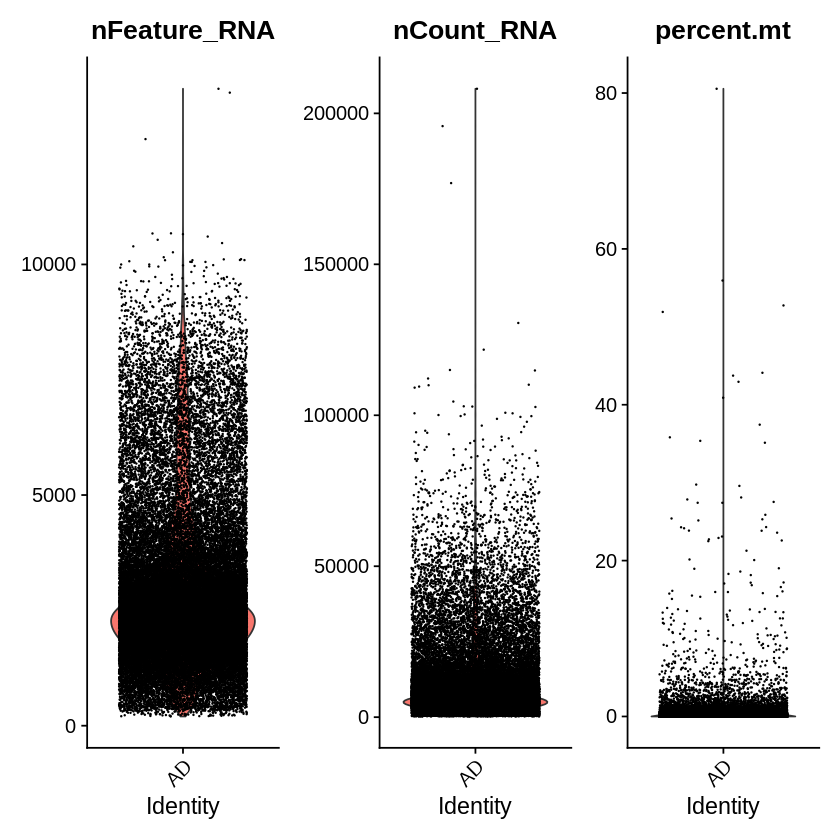

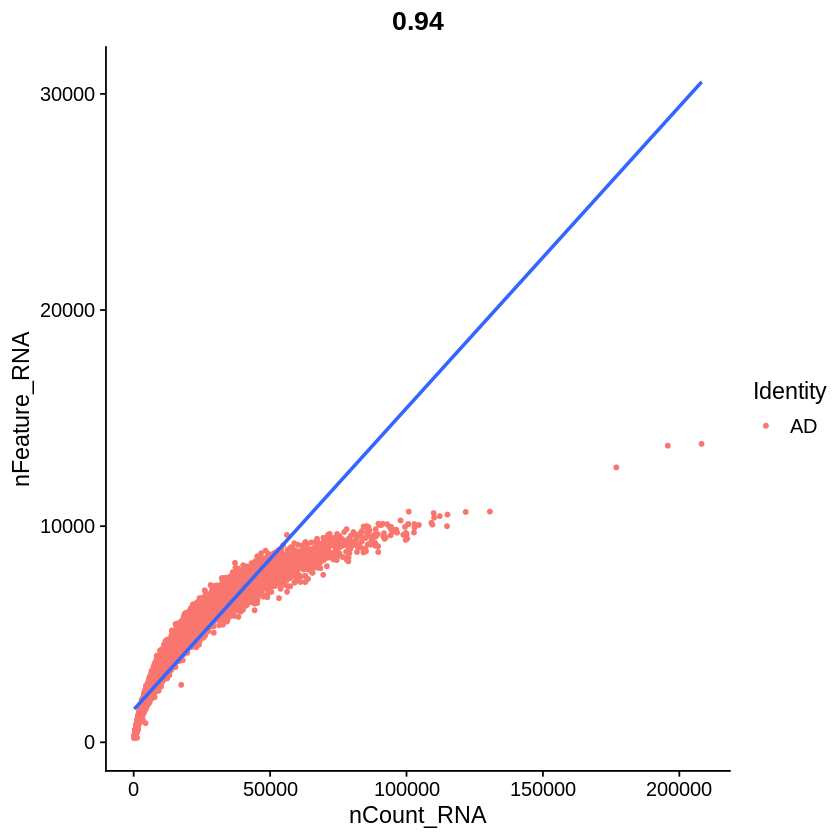

used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9292254  496.3   15625064   834.5   15625064  834.5
Vcells 438392760 3344.7 1449958382 11062.4 1190550292 9083.2

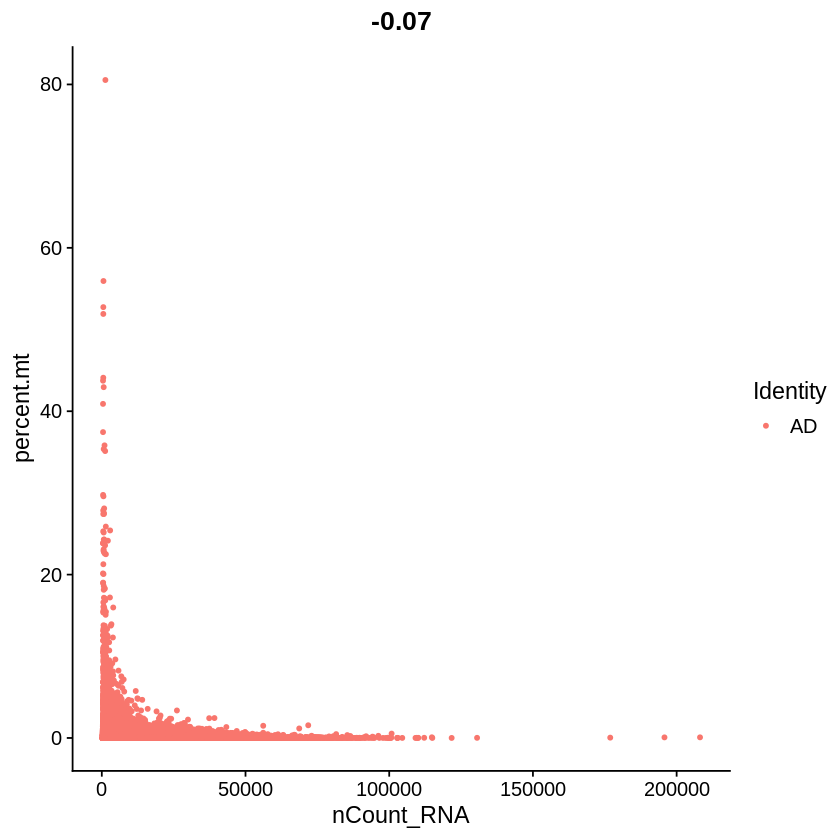

In [ ]:
# % MT reads
seurat_hdf5[["percent.mt"]] <- PercentageFeatureSet(seurat_hdf5, pattern = "^MT-")
View(seurat_hdf5@meta.data)

VlnPlot(seurat_hdf5, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
FeatureScatter(seurat_hdf5, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") +
  geom_smooth(method = 'lm')
FeatureScatter(seurat_hdf5, feature1 = "nCount_RNA", feature2 = "percent.mt")
gc()

In [ ]:
str(seurat_hdf5)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:138449539] 9 10 27 52 55 61 71 73 79 83 ...
  .. .. .. .. .. .. ..@ p       : int [1:48241] 0 6137 8141 10281 12256 13735 15987 18626 19835 23211 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 35265 48240
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:138449539] 1 1 1 1 1 1 1 1 1 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:48240, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..

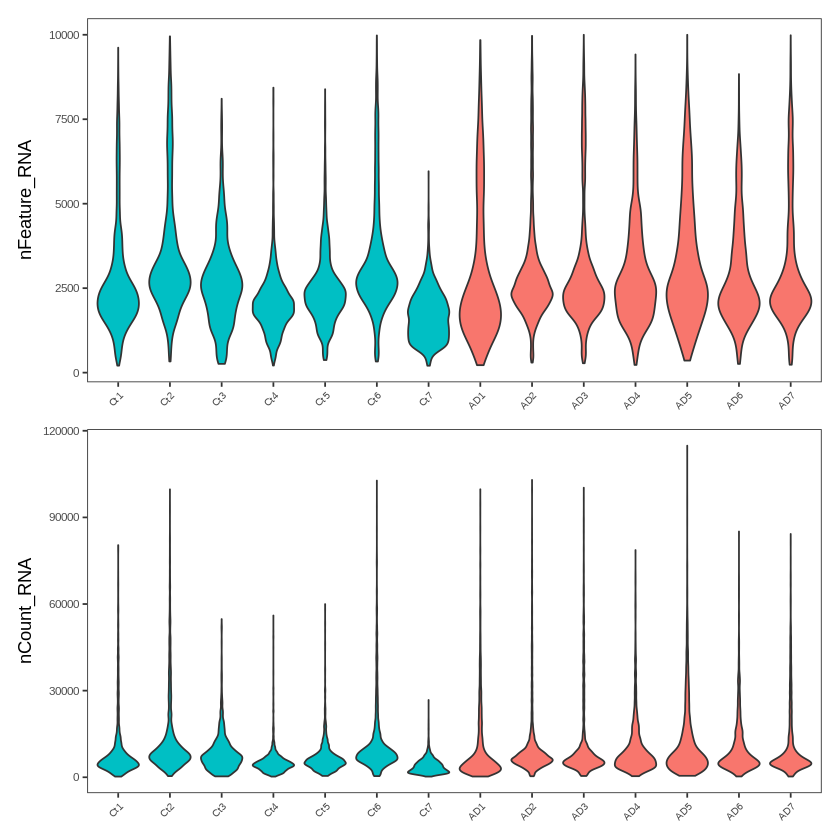

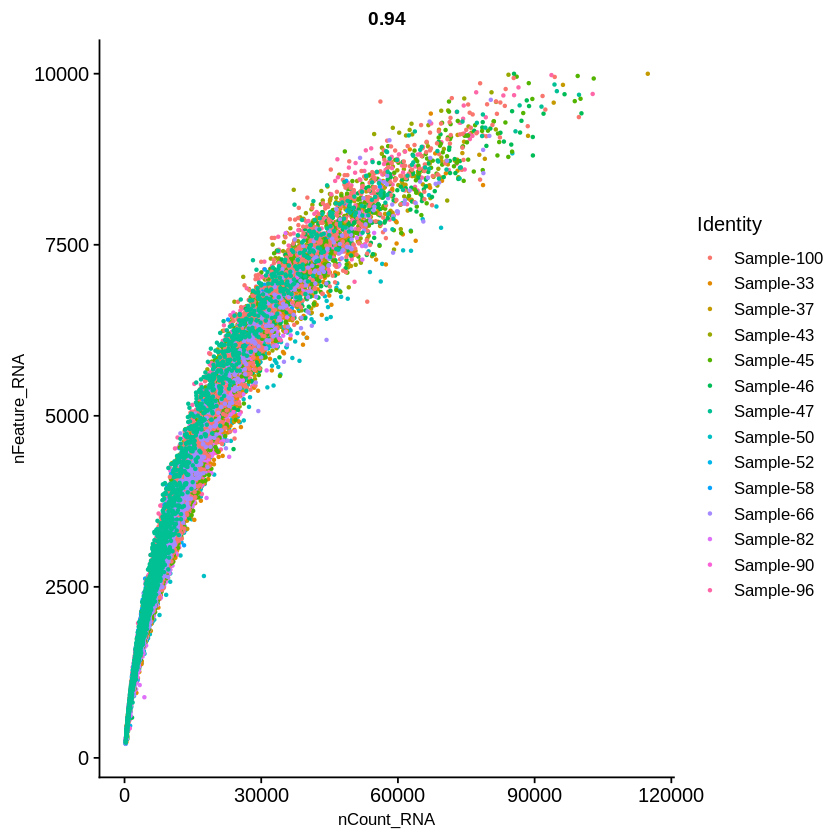

In [ ]:
meta1 = seurat_hdf5@meta.data
write.table(meta1, file=paste0('meta.seurat.raw.tsv'), quote = FALSE, sep = '\t', row.names = FALSE)
meta1 = meta1[rev(order(meta1$Diagnosis)), ]
meta1$sid = unsplit(lapply(split(meta1, meta1$Diagnosis), function(x) paste0(c(AD = 'AD', Control = 'Ct')[x$Diagnosis[1]], as.integer(factor(x$SampleID, level = unique(x$SampleID))))), meta1$Diagnosis)
meta1$sid = factor(meta1$sid, levels = unique(meta1$sid))
theme_bw2 = function() theme_bw() + theme(panel.grid = element_blank())
p1 = ggplot(meta1, aes(x = sid, y = nFeature_RNA, fill = Diagnosis)) + geom_violin(width = 0.8, scale = 'width') + theme_bw2() + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, size = 6, hjust = 1), axis.text.y = element_text(size = 7)) + xlab(NULL)
p2 = ggplot(meta1, aes(x = sid, y = nCount_RNA, fill = Diagnosis)) + geom_violin(width = 0.8, scale = 'width') + theme_bw2() + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, size = 6, hjust = 1), axis.text.y = element_text(size = 7)) + xlab(NULL)
print(p1 / p2)


seurat_hdf5@meta.data$SampleID = factor(seurat_hdf5@meta.data$SampleID)
p3 = FeatureScatter(seurat_hdf5, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size=0.6, group.by='SampleID') + theme(title=element_text(size=10), legend.text=element_text(size=10), legend.title=element_text(size=12))
print(p3)

In [ ]:
# 2. Filtering -----------------
seurat_hdf5 <- subset(seurat_hdf5, subset = nFeature_RNA > 200 & nFeature_RNA < 10000 & percent.mt < 5 & percent.mt > 0.1)
gc()

used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9263301  494.8   15625064   834.5   15625064  834.5
Vcells 434187347 3312.6 1449958382 11062.4 1190550292 9083.2

In [ ]:
# List all active variables in the session
ls()


[1] "file_path"          "filtered_matrix_CT" "metadata"          
[4] "new_sample_ids"     "seurat_hdf5"        "updated_metadata"

In [ ]:
# 3. Normalize data ----------
#seurat_hdf5 <- NormalizeData(seurat_hdf5, normalization.method = "LogNormalize", scale.factor = 10000)
# OR
seurat_hdf5 <- NormalizeData(seurat_hdf5)
#str(seurat_hdf5)
gc()

Normalizing layer: counts



used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9266680  494.9   15625064   834.5   15625064  834.5
Vcells 641270355 4892.6 1449958382 11062.4 1190550292 9083.2

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results



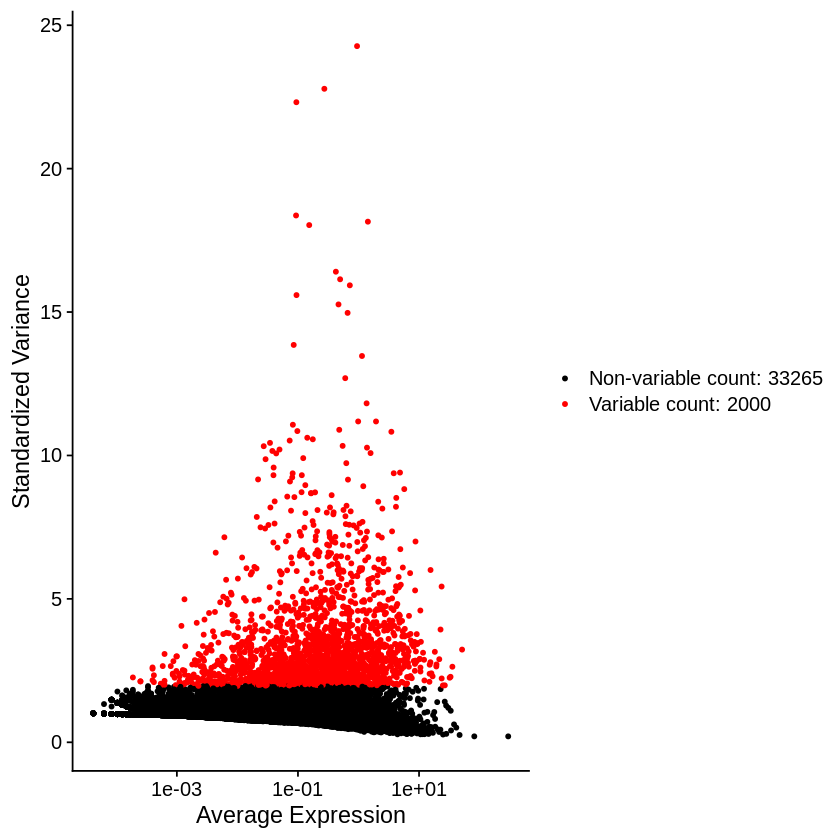

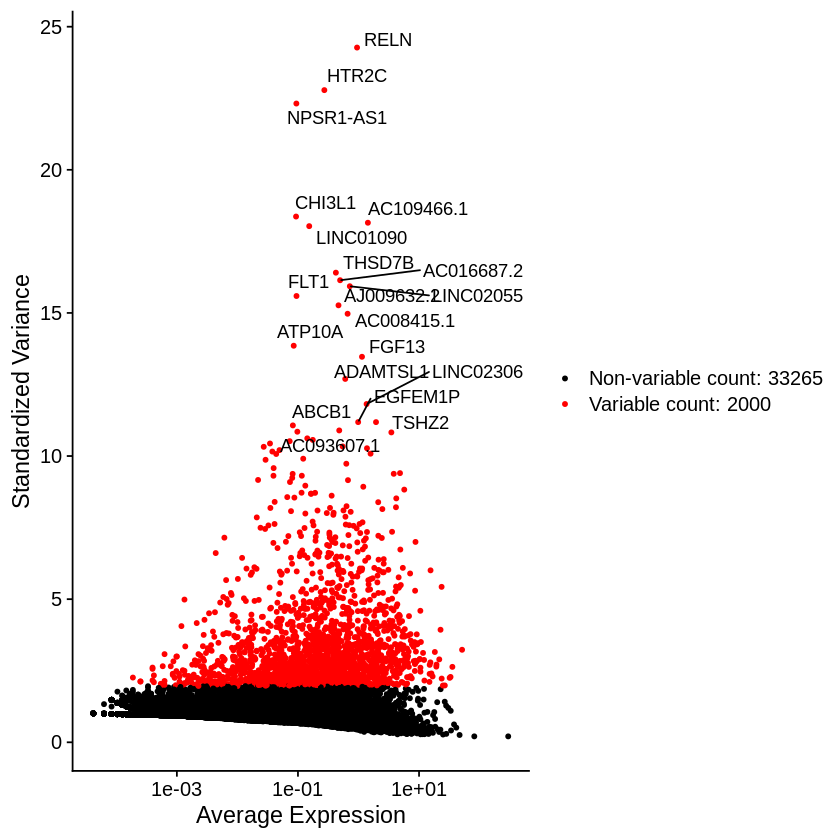

used      (Mb)   gc trigger (Mb)    max used   (Mb)  
Ncells   9337065  498.7   15625064   834.5   15625064  834.5
Vcells 644430794 4916.7 1449958382 11062.4 1190550292 9083.2

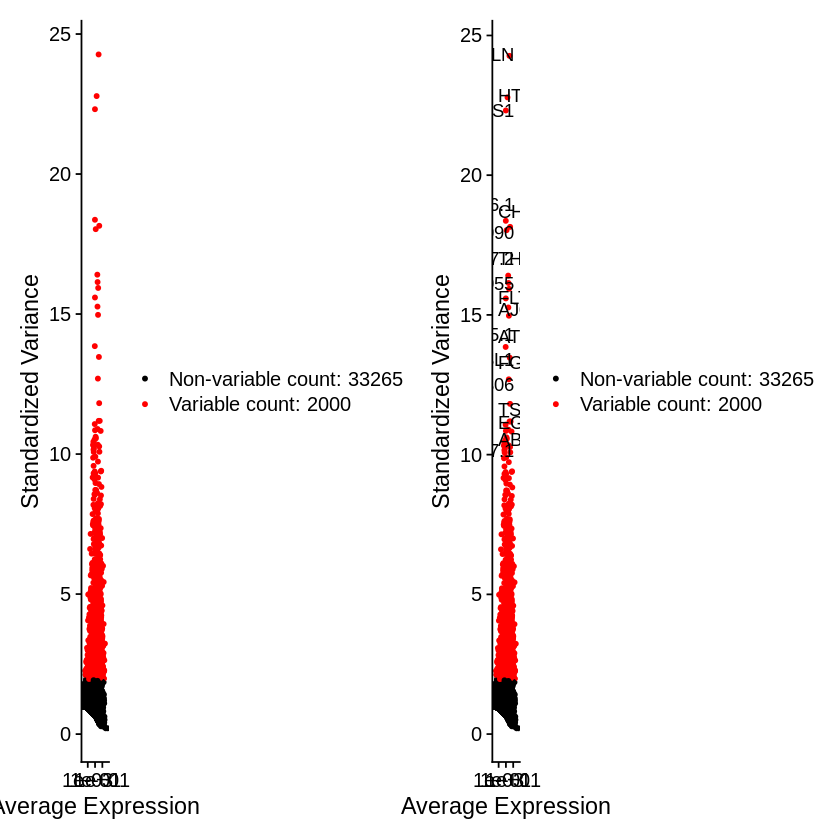

In [ ]:
# 4. Identify highly variable features --------------
seurat_hdf5 <- FindVariableFeatures(seurat_hdf5, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top20 <- head(VariableFeatures(seurat_hdf5), 20)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(seurat_hdf5)
plot2 <- LabelPoints(plot = plot1, points = top20, repel = TRUE)
plot1
plot2
plot1|plot2
gc()

In [ ]:
head(seurat_hdf5)

orig.ident nCount_RNA nFeature_RNA SampleID  Diagnosis Batch
AAACCCAAGCGGTAGT-2 AD         25340      6137         Sample-43 AD        1    
AAACCCAAGGTTCAGG-2 AD          5245      2004         Sample-43 AD        1    
AAACCCAGTCGTTCAA-2 AD          4921      2140         Sample-43 AD        1    
AAACCCATCGGCGATC-2 AD          4572      1975         Sample-43 AD        1    
AAACCCATCTGGCCGA-2 AD          2759      1479         Sample-43 AD        1    
AAACGAAAGACATCCT-2 AD          5824      2252         Sample-43 AD        1    
AAACGAAGTAGATTAG-2 AD          6448      2639         Sample-43 AD        1    
AAACGAAGTAGGGTAC-2 AD          1912      1209         Sample-43 AD        1    
AAACGCTCATTATGCG-2 AD          9693      3376         Sample-43 AD        1    
AAACGCTGTAGAAACT-2 AD         26980      6173         Sample-43 AD        1    
                   Cell.Type cluster Age Sex PMI  Tangle.Stage Plaque.Stage RIN
AAACCCAAGCGGTAGT-2 INH       INH1    90  F   4.17 Stage 6      Stage B      8.9
AAACCCAAGGTTCAGG-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCAGTCGTTCAA-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCATCGGCGATC-2 ODC       ODC2    90  F   4.17 Stage 6      Stage B      8.9
AAACCCATCTGGCCGA-2 MG        MG3     90  F   4.17 Stage 6      Stage B      8.9
AAACGAAAGACATCCT-2 ODC       ODC6    90  F   4.17 Stage 6      Stage B      8.9
AAACGAAGTAGATTAG-2 ODC       ODC1    90  F   4.17 Stage 6      Stage B      8.9
AAACGAAGTAGGGTAC-2 ODC       ODC1    90  F   4.17 Stage 6      Stage B      8.9
AAACGCTCATTATGCG-2 ODC       ODC7    90  F   4.17 Stage 6      Stage B      8.9
AAACGCTGTAGAAACT-2 EX        EX2     90  F   4.17 Stage 6      Stage B      8.9
                   percent.mt
AAACCCAAGCGGTAGT-2 0.04340963
AAACCCAAGGTTCAGG-2 0.03813155
AAACCCAGTCGTTCAA-2 0.18288966
AAACCCATCGGCGATC-2 0.19685039
AAACCCATCTGGCCGA-2 0.39869518
AAACGAAAGACATCCT-2 0.00000000
AAACGAAGTAGATTAG-2 0.15508685
AAACGAAGTAGGGTAC-2 0.73221757
AAACGCTCATTATGCG-2 0.06190034
AAACGCTGTAGAAACT-2 0.41512231

In [ ]:
#dim(seurat_hdf5)

In [ ]:
# 5. Scaling of all genes-------------
seurat_hdf5 <- ScaleData(seurat_hdf5)
gc()

Centering and scaling data matrix



used      (Mb) gc trigger (Mb)    max used   (Mb)  
Ncells   9304979  497   15625064   834.5   15625064  834.5
Vcells 738194999 5632 1449958382 11062.4 1190550292 9083.2

In [ ]:
# 5. Scaling of only variable genes-------------
#seurat_hdf5 <- ScaleData(seurat_hdf5, features = VariableFeatures(seurat_hdf5))
#dim(seurat_hdf5)
#str(seurat_hdf5)
#gc()

In [ ]:
# 6. Perform Linear dimensionality reduction --------------
seurat_hdf5 <- RunPCA(seurat_hdf5, features = VariableFeatures(object = seurat_hdf5))

# visualize PCA results
print(seurat_hdf5[["pca"]], dims = 1:5, nfeatures = 5)


PC_ 1 
Positive:  SLC1A3, ADAMTS18, LAMA2, LINC01505, LINC01099, TBXAS1, DOCK2, SAMMSON, TGFBR2, DOCK8 
	   FYB1, APBB1IP, LINC02511, MYO1F, ADAM28, RHBDF2, PTPRC, INPP5D, SYK, CSF1R 
	   FLI1, DLEU7-AS1, SLCO2B1, SP100, C3, PIK3R5, PARD3B, AC025810.1, IKZF1, RBM47 
Negative:  DLGAP1, STXBP5L, MYT1L, RIMS2, GRIN2B, CCSER1, FAM155A, SLC4A10, FGF14, PTPRN2 
	   GABRB3, CACNA1B, PLCB1, FGF12, AGBL4, FRMPD4, RBFOX1, GABBR2, SYT1, LRFN5 
	   KSR2, OPCML, GRM5, CADPS, DLGAP2, SCN2A, SYN2, MAP2, THRB, ATRNL1 
PC_ 2 
Positive:  CNTNAP2, RYR2, IQCJ-SCHIP1, CDH8, GRIN2A, SV2B, ROBO1, PRKCB, SYT1, KCNQ5 
	   MIR137HG, CHRM3, MLIP, RBFOX3, MTUS2, ADGRL2, LINC01122, KHDRBS2, LDB2, VSNL1 
	   DLGAP2, CDH12, KCNH1, NDST3, LINC01250, GRIN1, ATP8A2, GALNT17, GABBR2, OLFM3 
Negative:  SLC1A2, RFX4, RNF219-AS1, ATP1A2, ADGRV1, HIF3A, BMPR1B, PRDM16, NKAIN3, PITPNC1 
	   PARD3, RANBP3L, ARHGEF26, STON2, COL5A3, SPON1, GLI3, LINC00299, ALDH1L1, EYA2 
	   RGS20, AQP4, FGFR3, RYR3, CACHD1, LINC00499, GLIS3, 

PC_ 1 
Positive:  SLC1A3, ADAMTS18, LAMA2, LINC01505, LINC01099 
Negative:  DLGAP1, STXBP5L, MYT1L, RIMS2, GRIN2B 
PC_ 2 
Positive:  CNTNAP2, RYR2, IQCJ-SCHIP1, CDH8, GRIN2A 
Negative:  SLC1A2, RFX4, RNF219-AS1, ATP1A2, ADGRV1 
PC_ 3 
Positive:  ERBB4, ROBO1, ADARB2, KAZN, PLD5 
Negative:  DOCK8, APBB1IP, INPP5D, SLCO2B1, TBXAS1 
PC_ 4 
Positive:  NXPH1, GRIK1, PCDH15, LUZP2, GAD1 
Negative:  MLIP, LY86-AS1, AL117329.1, TESPA1, SATB2 
PC_ 5 
Positive:  CA10, AC004852.2, MEGF11, FERMT1, MYT1 
Negative:  GAD2, DLX6-AS1, ANK1, GRIP2, BTBD11 


used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9321624  497.9   15625064   834.5   15625064   834.5
Vcells 740790869 5651.8 1449958382 11062.4 1384231576 10560.9

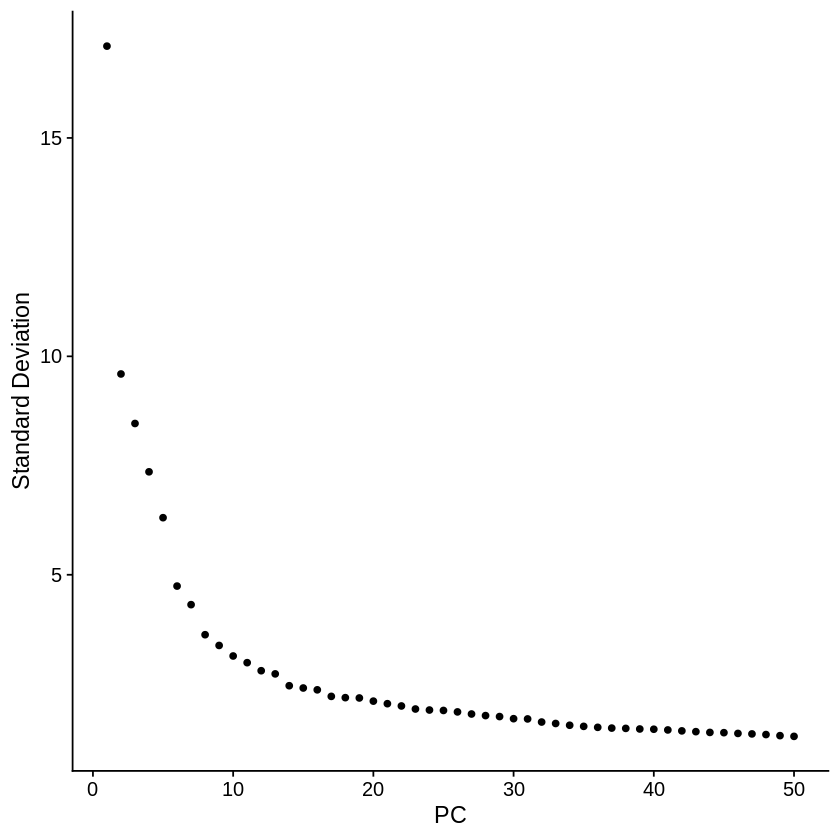

In [ ]:
# determine dimensionality of the data
ElbowPlot(seurat_hdf5,ndims = 50)
gc()

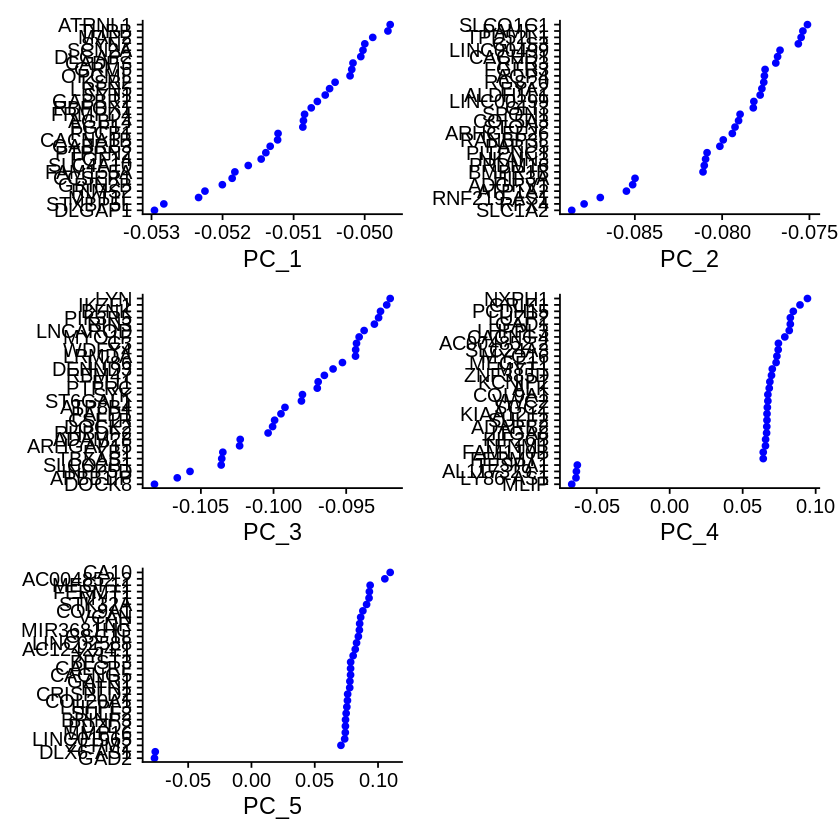

In [ ]:
VizDimLoadings(seurat_hdf5, dims = 1:5, reduction = "pca")

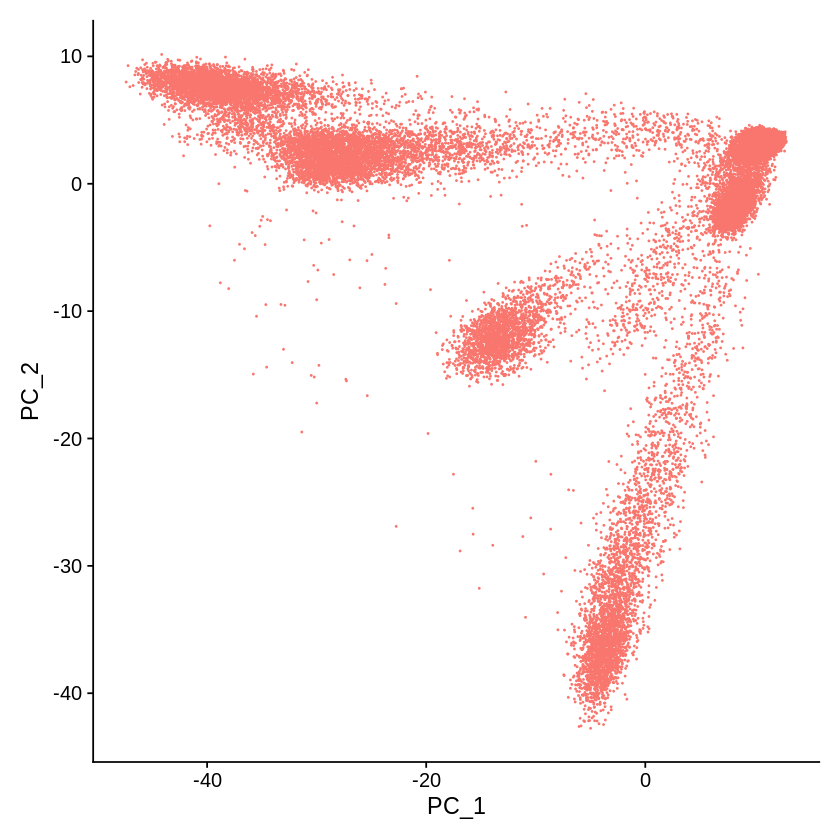

In [ ]:
DimPlot(seurat_hdf5, reduction= "pca") + NoLegend()

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9325579  498.1   15625064   834.5   15625064   834.5
Vcells 740949532 5653.0 1449958382 11062.4 1384231576 10560.9

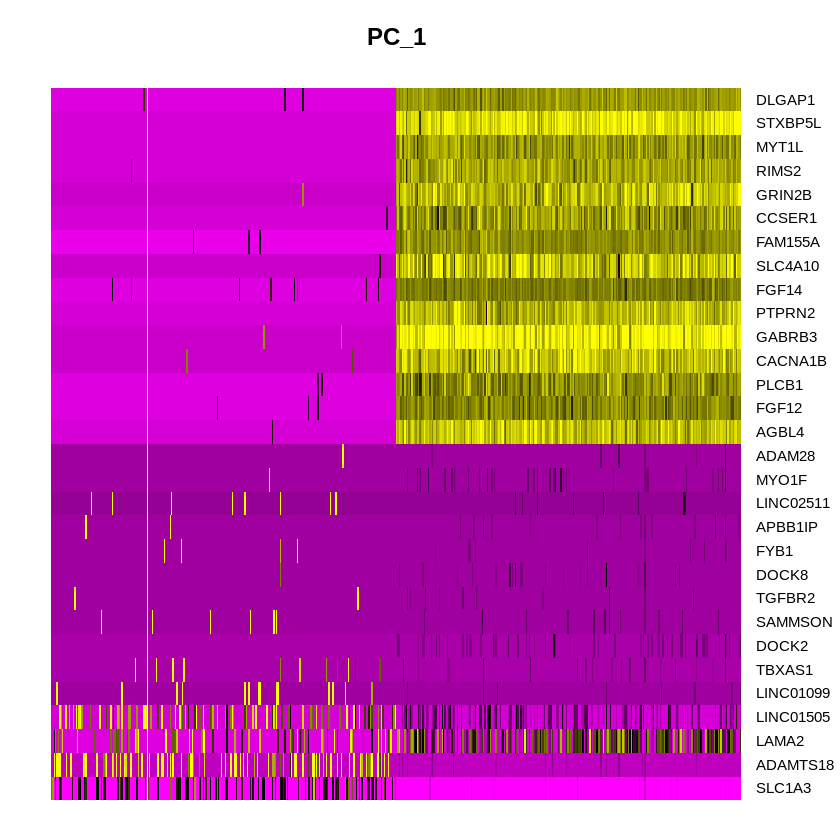

In [ ]:
DimHeatmap(seurat_hdf5, dims = 1, cells = 500, balanced = TRUE)
gc()

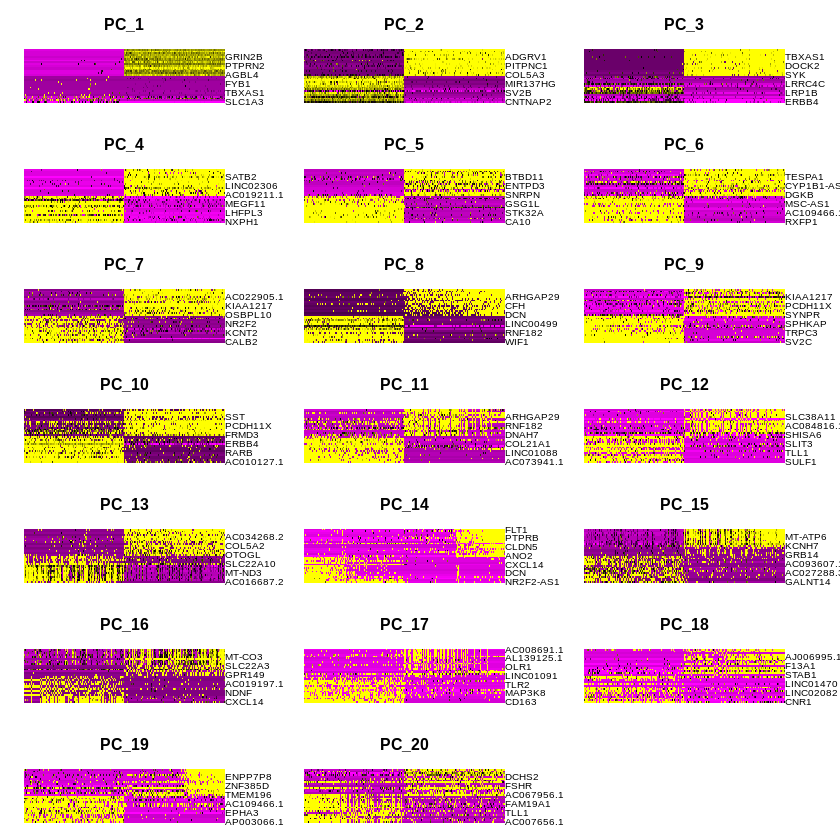

In [ ]:
DimHeatmap(seurat_hdf5, dims = 1:20, cells = 500, balanced = TRUE)

In [ ]:
dim(seurat_hdf5)

[1] 35265 47944

In [ ]:
install.packages('BiocManager')
BiocManager::install('glmGamPoi')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'glmGamPoi'

also installing the dependencies ‘sparseMatrixStats’, ‘rhdf5’, ‘rhdf5filters’, ‘Rhdf5lib’, ‘assorthead’, ‘DelayedMatrixStats’, ‘HDF5Array’, ‘beachmat’


Warning message in install.packages(...):
“installation of package ‘beachmat’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘rhdf5’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘HDF5Array’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘glmGamPoi’ had non-zero exit status”
Old packages: 'MASS', 'readxl', 'xml2'



In [ ]:
seurat_hdf5_sct<- SCTransform(seurat_hdf5, verbose = TRUE)


Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 33634 by 47944

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



null device 
          1

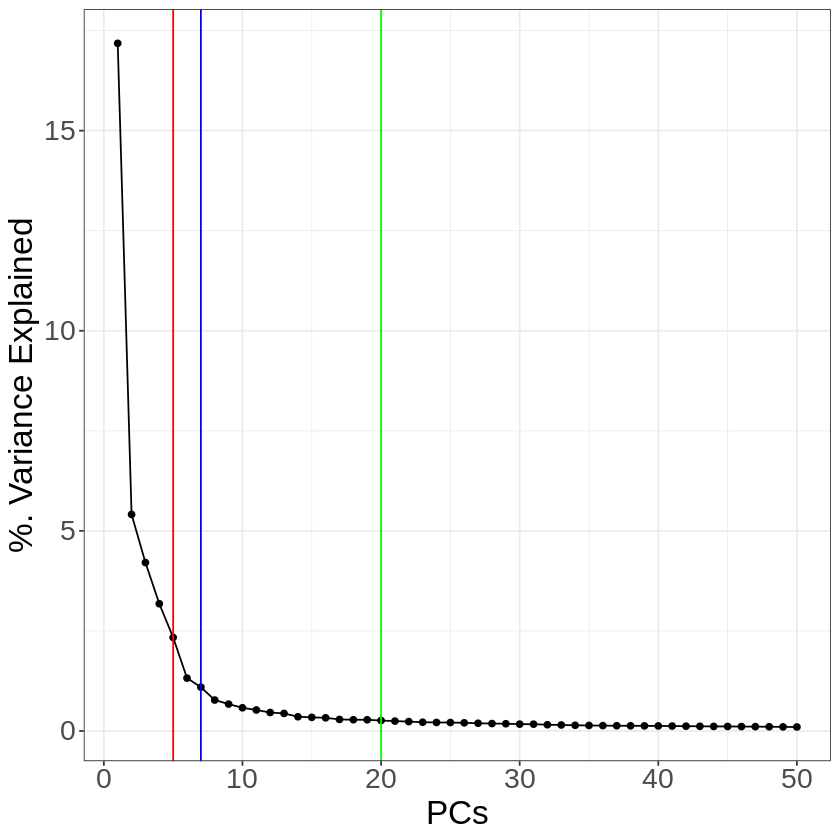

In [ ]:
total_variance <- sum(matrixStats::rowVars(Seurat::GetAssayData(seurat_hdf5, assay = "RNA", layer = "scale.data")))
eigValues =  (seurat_hdf5$pca@stdev)^2


#Plot PCA elbow
pca.pdata = data.frame(PC = 1:length(seurat_hdf5$pca@stdev),
                       eigValues = (seurat_hdf5$pca@stdev)^2,  ## EigenValues
                       varExplained = eigValues / total_variance * 100,
                       totalExplained = cumsum(eigValues / total_variance * 100))

pobj = ggplot(data = pca.pdata,aes(x = PC,y = varExplained)) + geom_point() + geom_line() +
  geom_vline(xintercept = c(5,7,20),colour = c("red","blue","green")) +
  theme_bw() +
  labs(x = "PCs",y = "%. Variance Explained") +
  theme(axis.title = element_text(size = 20),axis.text = element_text(size = 17))

print(pobj)
dev.off()

In [ ]:
pca_loadings <- seurat_hdf5[["pca"]]@feature.loadings
# Check the most contributing genes to the first PC (or whichever PC has the high SD)
head(pca_loadings[,1])


RELN        HTR2C    NPSR1-AS1       CHI3L1   AC109466.1    LINC01090 
-0.003898545 -0.010141919 -0.004876843 -0.001627902 -0.022576908 -0.011470229

In [ ]:
dim(pca_loadings)

[1] 2000   50

In [ ]:
# 7. Clustering ------------
seurat_hdf5 <- FindNeighbors(seurat_hdf5, dims = 1:30)

# understanding resolution
seurat_hdf5 <- FindClusters(seurat_hdf5, resolution = c(0.1,0.2,0.3,0.5))
View(seurat_hdf5@meta.data)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47944
Number of edges: 1390809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9795
Number of communities: 25
Elapsed time: 8 seconds


7 singletons identified. 18 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47944
Number of edges: 1390809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9645
Number of communities: 27
Elapsed time: 8 seconds


7 singletons identified. 20 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47944
Number of edges: 1390809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 29
Elapsed time: 10 seconds


7 singletons identified. 22 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 47944
Number of edges: 1390809

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9349
Number of communities: 34
Elapsed time: 10 seconds


7 singletons identified. 27 final clusters.



orig.ident nCount_RNA nFeature_RNA SampleID  Diagnosis
AAACCCAAGCGGTAGT-2  AD         25340      6137         Sample-43 AD       
AAACCCAAGGTTCAGG-2  AD          5245      2004         Sample-43 AD       
AAACCCAGTCGTTCAA-2  AD          4921      2140         Sample-43 AD       
AAACCCATCGGCGATC-2  AD          4572      1975         Sample-43 AD       
AAACCCATCTGGCCGA-2  AD          2759      1479         Sample-43 AD       
AAACGAAAGACATCCT-2  AD          5824      2252         Sample-43 AD       
AAACGAAGTAGATTAG-2  AD          6448      2639         Sample-43 AD       
AAACGAAGTAGGGTAC-2  AD          1912      1209         Sample-43 AD       
AAACGCTCATTATGCG-2  AD          9693      3376         Sample-43 AD       
AAACGCTGTAGAAACT-2  AD         26980      6173         Sample-43 AD       
AAACGCTTCTGGTCAA-2  AD          5972      2308         Sample-43 AD       
AAAGAACAGTCACGAG-2  AD          6431      2475         Sample-43 AD       
AAAGAACCAACACTAC-2  AD         27691      5706         Sample-43 AD       
AAAGAACCATCTTCGC-2  AD          5523      2241         Sample-43 AD       
AAAGAACTCCGTGTGG-2  AD          5557      2288         Sample-43 AD       
AAAGGATGTTGCCAAT-2  AD          9565      3371         Sample-43 AD       
AAAGGGCAGACAAGCC-2  AD          9218      3298         Sample-43 AD       
AAAGGGCAGGCGAACT-2  AD          4806      2094         Sample-43 AD       
AAAGGGCCAAATGATG-2  AD          4736      2022         Sample-43 AD       
AAAGGGCCAATCGCCG-2  AD         43755      7559         Sample-43 AD       
AAAGGGCCACGCGTCA-2  AD          4214      2038         Sample-43 AD       
AAAGGGCGTTGGACCC-2  AD         16685      5058         Sample-43 AD       
AAAGGGCTCTTCTTCC-2  AD          5000      2145         Sample-43 AD       
AAAGGTAAGTATAGGT-2  AD          4188      1831         Sample-43 AD       
AAAGGTATCAGACCCG-2  AD          3714      1736         Sample-43 AD       
AAAGTCCAGGTATAGT-2  AD          4451      1990         Sample-43 AD       
AAAGTCCTCACCTGTC-2  AD          6380      2392         Sample-43 AD       
AAAGTCCTCGACCCAG-2  AD          6363      2479         Sample-43 AD       
AAAGTGAAGCCACAAG-2  AD          3682      1734         Sample-43 AD       
AAAGTGACATCGGCCA-2  AD          5474      2399         Sample-43 AD       
⋮                   ⋮          ⋮          ⋮            ⋮         ⋮        
TTTCATGTCCTTCTTC-18 AD         19025      5133         Sample-47 AD       
TTTCATGTCTTCCCGA-18 AD          5687      2147         Sample-47 AD       
TTTCCTCCAGTCGAGA-18 AD          3034      1554         Sample-47 AD       
TTTCCTCCATCGATAC-18 AD         39701      6779         Sample-47 AD       
TTTCCTCGTAGAGTTA-18 AD          4213      1904         Sample-47 AD       
TTTCCTCGTTTACACG-18 AD          9970      3064         Sample-47 AD       
TTTCCTCTCATTGCTT-18 AD          9594      2755         Sample-47 AD       
TTTCGATAGTAGCTCT-18 AD           433       352         Sample-47 AD       
TTTCGATCACCACTGG-18 AD          4713      2010         Sample-47 AD       
TTTCGATGTTGAGAGC-18 AD          1755      1082         Sample-47 AD       
TTTCGATTCAGCATTG-18 AD         45453      7911         Sample-47 AD       
TTTGACTAGTATCCTG-18 AD          2078      1274         Sample-47 AD       
TTTGACTGTCAGGTAG-18 AD          2762      1458         Sample-47 AD       
TTTGACTTCCTAGCGG-18 AD          2064      1349         Sample-47 AD       
TTTGATCAGTAAGAGG-18 AD          5449      2389         Sample-47 AD       
TTTGATCAGTTGGAAT-18 AD          4575      2100         Sample-47 AD       
TTTGATCCAGCTATAC-18 AD          5477      2542         Sample-47 AD       
TTTGATCTCATTACCT-18 AD          3909      1798         Sample-47 AD       
TTTGATCTCTTCGTAT-18 AD         21023      5346         Sample-47 AD       
TTTGGAGAGCCTCAAT-18 AD           979       747         Sample-47 AD       
TTTGGAGAGGACGGAG-18 AD         23998      6249         Sample-47 AD       
TTTGGAGAGGTCACAG-18 AD          8301      308

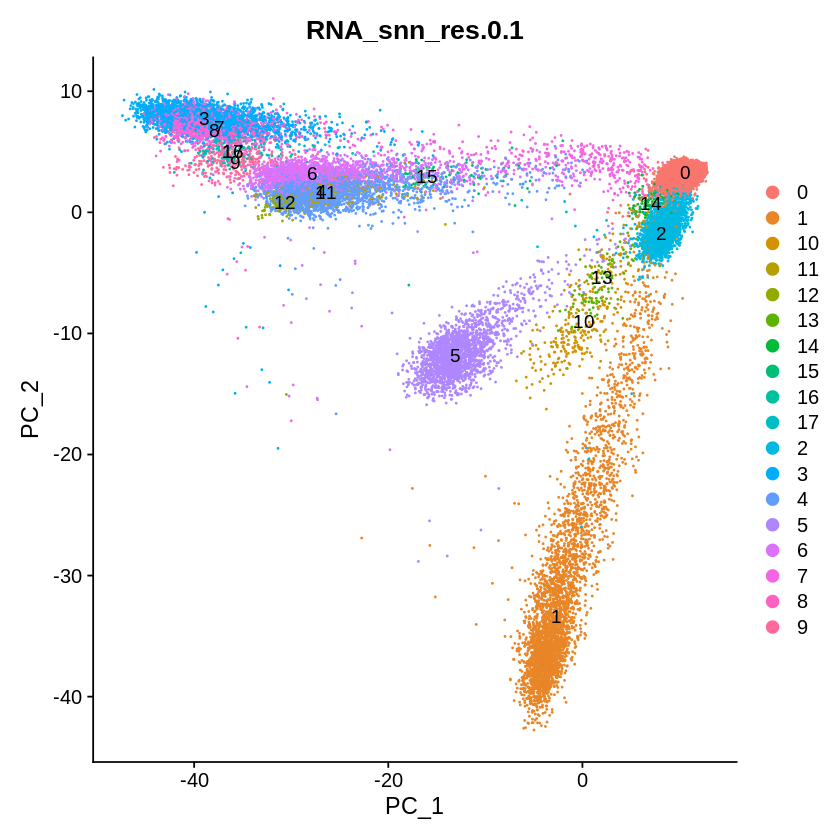

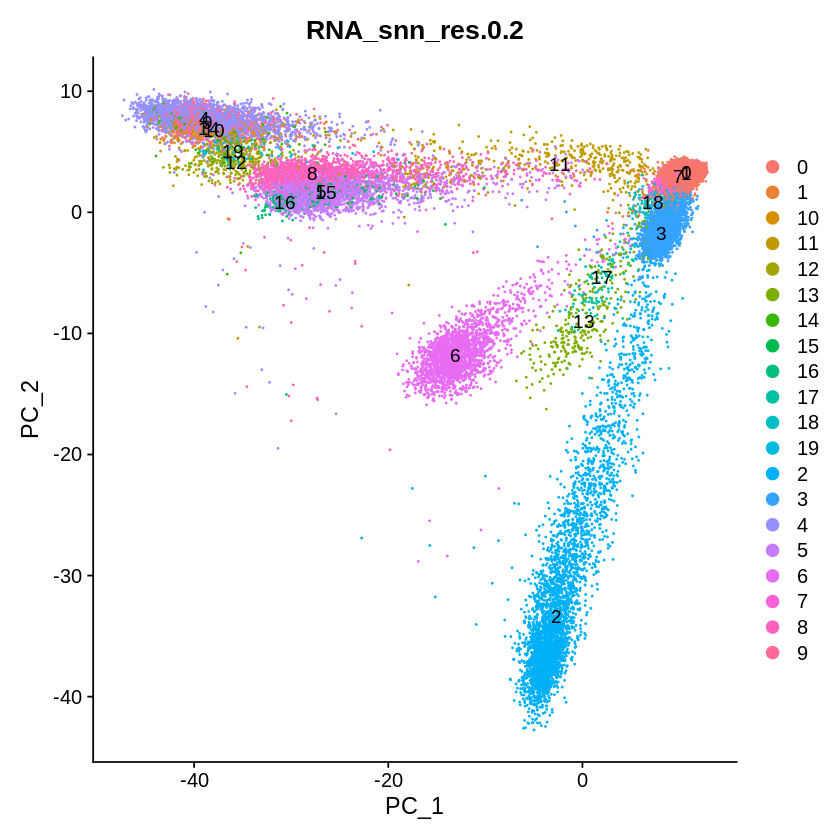

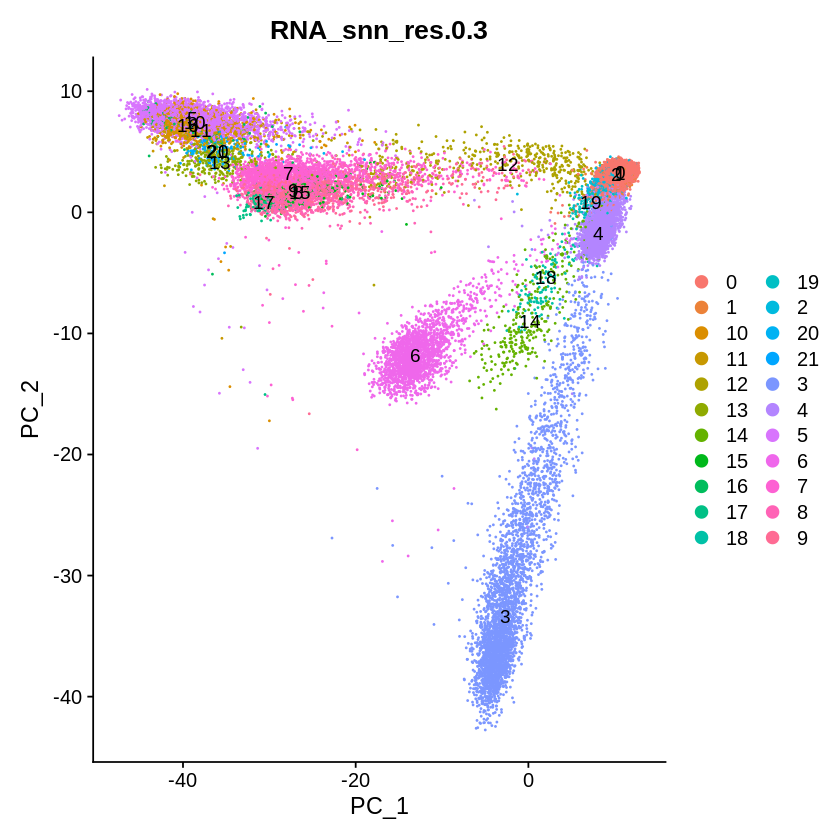

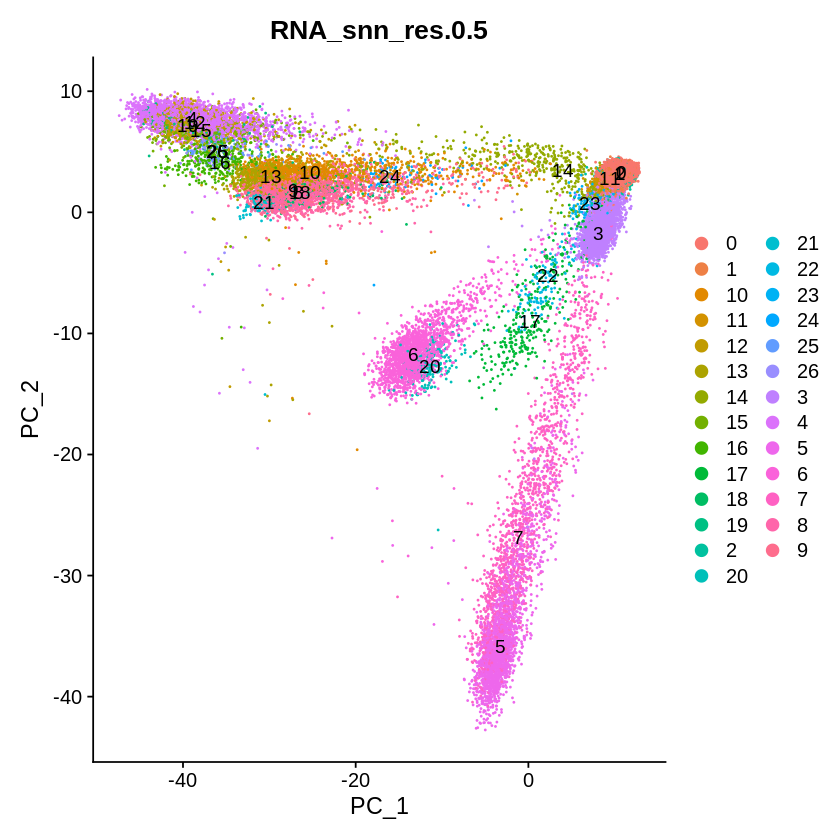

In [ ]:
DimPlot(seurat_hdf5, group.by = "RNA_snn_res.0.1", label = TRUE)
DimPlot(seurat_hdf5, group.by = "RNA_snn_res.0.2", label = TRUE)
DimPlot(seurat_hdf5, group.by = "RNA_snn_res.0.3", label = TRUE)
DimPlot(seurat_hdf5, group.by = "RNA_snn_res.0.5", label = TRUE)

In [ ]:
head(Idents(seurat_hdf5),5)

AAACCCAAGCGGTAGT-2 AAACCCAAGGTTCAGG-2 AAACCCAGTCGTTCAA-2 AAACCCATCGGCGATC-2 
                20                  0                  2                  0 
AAACCCATCTGGCCGA-2 
                40 
45 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 44

AAACCCAAGCGGTAGT-2 AAACCCAAGGTTCAGG-2 AAACCCAGTCGTTCAA-2 AAACCCATCGGCGATC-2 
                 4                  0                  0                  0 
AAACCCATCTGGCCGA-2 AAACGAAAGACATCCT-2 
                14                  0 
Levels: 0 1 10 11 12 13 14 15 16 17 2 3 4 5 6 7 8 9

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9410836  502.6   15625064   834.5   15625064   834.5
Vcells 747164855 5700.5 1449958382 11062.4 1384231576 10560.9

14:45:52 UMAP embedding parameters a = 0.9922 b = 1.112

14:45:52 Read 47944 rows and found 20 numeric columns

14:45:52 Using Annoy for neighbor search, n_neighbors = 30

14:45:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:45:59 Writing NN index file to temp file /tmp/RtmpnCzyJH/file13a165135769

14:45:59 Searching Annoy index using 1 thread, search_k = 3000

14:46:22 Annoy recall = 100%

14:46:23 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:46:25 Initializing from normalized Laplacian + noise (using RSpectra)

14:46:41 Commencing optimization for 200 epochs, with 2245762 positive edges

14:46:41 Using rng type: pcg

14:47:05 Optimization finished



used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9430247  503.7   15625064   834.5   15625064   834.5
Vcells 747817983 5705.4 1449958382 11062.4 1384231576 10560.9

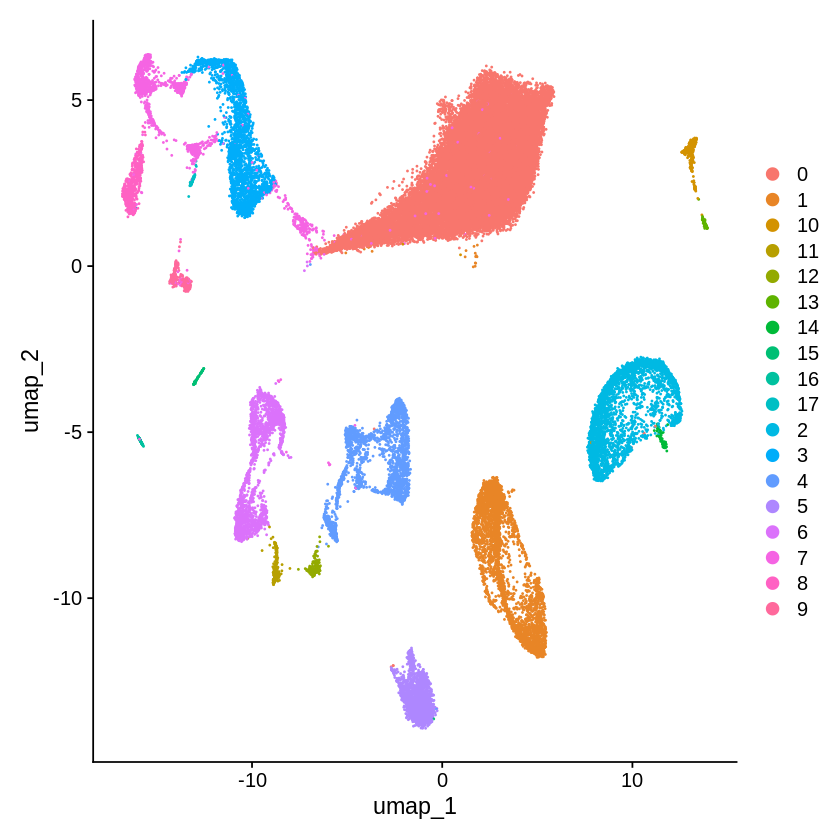

In [ ]:
Idents(seurat_hdf5) <- "RNA_snn_res.0.1"
head(Idents(seurat_hdf5))
gc()
# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages = 'umap-learn')
seurat_hdf5 <- RunUMAP(seurat_hdf5, dims = 1:20)
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(seurat_hdf5, reduction = "umap")
gc()

AAACCCAAGCGGTAGT-2 AAACCCAAGGTTCAGG-2 AAACCCAGTCGTTCAA-2 AAACCCATCGGCGATC-2 
                 5                  0                  7                  0 
AAACCCATCTGGCCGA-2 AAACGAAAGACATCCT-2 
                18                  0 
Levels: 0 1 10 11 12 13 14 15 16 17 18 19 2 3 4 5 6 7 8 9

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9410833  502.6   15625064   834.5   15625064   834.5
Vcells 747164863 5700.5 1449958382 11062.4 1384231576 10560.9

14:44:36 UMAP embedding parameters a = 0.9922 b = 1.112

14:44:36 Read 47944 rows and found 20 numeric columns

14:44:36 Using Annoy for neighbor search, n_neighbors = 30

14:44:36 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:44:43 Writing NN index file to temp file /tmp/RtmpnCzyJH/file13a15ac04333

14:44:43 Searching Annoy index using 1 thread, search_k = 3000

14:45:06 Annoy recall = 100%

14:45:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:45:09 Initializing from normalized Laplacian + noise (using RSpectra)

14:45:25 Commencing optimization for 200 epochs, with 2245762 positive edges

14:45:25 Using rng type: pcg

14:45:49 Optimization finished



used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9431532  503.7   15625064   834.5   15625064   834.5
Vcells 747821235 5705.5 1449958382 11062.4 1384231576 10560.9

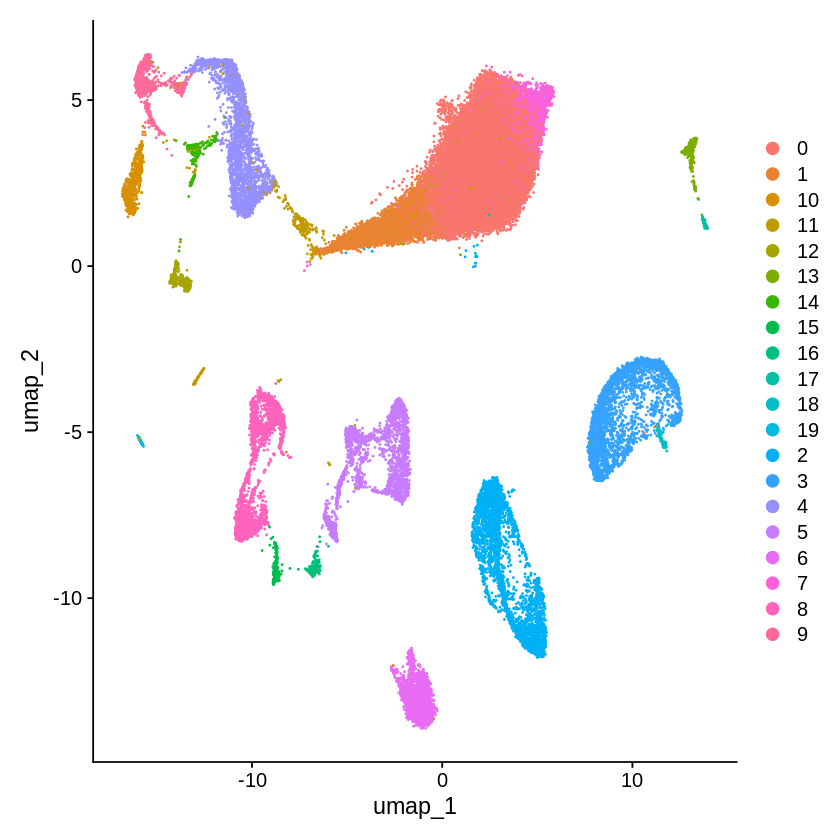

In [ ]:
Idents(seurat_hdf5) <- "RNA_snn_res.0.2"
head(Idents(seurat_hdf5))
gc()
# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages = 'umap-learn')
seurat_hdf5 <- RunUMAP(seurat_hdf5, dims = 1:20)
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(seurat_hdf5, reduction = "umap")
gc()

In [ ]:
Idents(seurat_hdf5) <- "RNA_snn_res.0.3"
head(Idents(seurat_hdf5))
gc()

AAACCCAAGCGGTAGT-2 AAACCCAAGGTTCAGG-2 AAACCCAGTCGTTCAA-2 AAACCCATCGGCGATC-2 
                 8                  0                  2                  0 
AAACCCATCTGGCCGA-2 AAACGAAAGACATCCT-2 
                19                  0 
Levels: 0 1 10 11 12 13 14 15 16 17 18 19 2 20 21 3 4 5 6 7 8 9

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9410736  502.6   15625064   834.5   15625064   834.5
Vcells 747164542 5700.5 1449958382 11062.4 1384231576 10560.9

14:43:20 UMAP embedding parameters a = 0.9922 b = 1.112

14:43:20 Read 47944 rows and found 20 numeric columns

14:43:20 Using Annoy for neighbor search, n_neighbors = 30

14:43:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:43:27 Writing NN index file to temp file /tmp/RtmpnCzyJH/file13a17ce6aa93

14:43:27 Searching Annoy index using 1 thread, search_k = 3000

14:43:50 Annoy recall = 100%

14:43:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:43:54 Initializing from normalized Laplacian + noise (using RSpectra)

14:44:09 Commencing optimization for 200 epochs, with 2245762 positive edges

14:44:09 Using rng type: pcg

14:44:33 Optimization finished



used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9432777  503.8   15625064   834.5   15625064   834.5
Vcells 747824322 5705.5 1449958382 11062.4 1384231576 10560.9

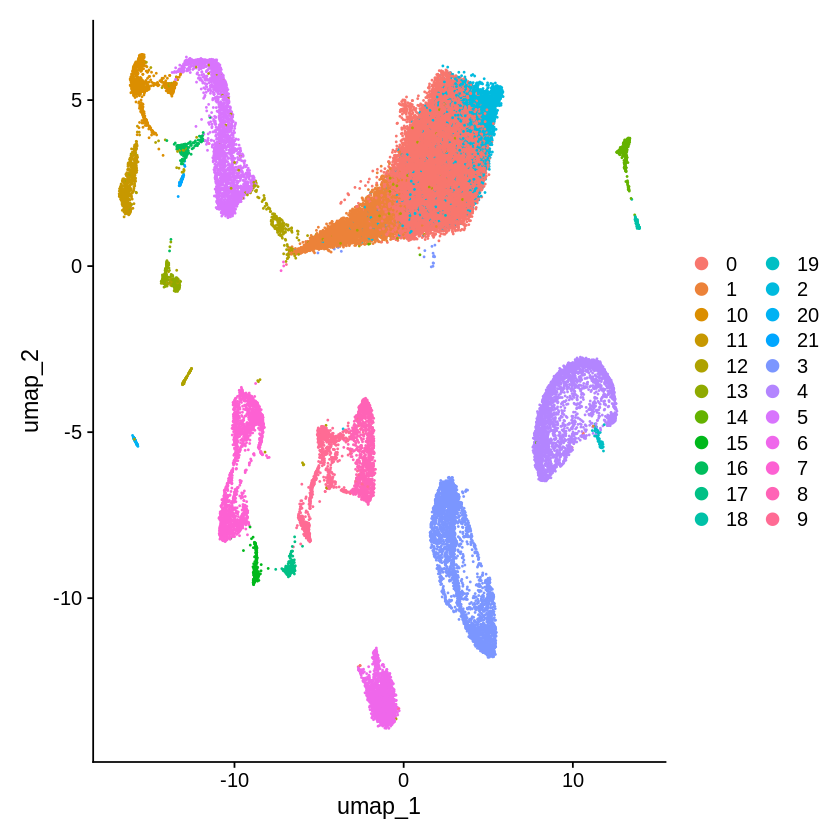

In [ ]:
# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages = 'umap-learn')
seurat_hdf5 <- RunUMAP(seurat_hdf5, dims = 1:20)
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(seurat_hdf5, reduction = "umap")
gc()

AAACCCAAGCGGTAGT-2 AAACCCAAGGTTCAGG-2 AAACCCAGTCGTTCAA-2 AAACCCATCGGCGATC-2 
                 8                  0                  1                  1 
AAACCCATCTGGCCGA-2 AAACGAAAGACATCCT-2 
                23                  1 
27 Levels: 0 1 10 11 12 13 14 15 16 17 18 19 2 20 21 22 23 24 25 26 3 4 5 ... 9

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9385337  501.3   15625064   834.5   15625064   834.5
Vcells 747345911 5701.8 1449958382 11062.4 1384231576 10560.9

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:42:05 UMAP embedding parameters a = 0.9922 b = 1.112

14:42:05 Read 47944 rows and found 20 numeric columns

14:42:05 Using Annoy for neighbor search, n_neighbors = 30

14:42:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:42:12 Writing NN index file to temp file /tmp/RtmpnCzyJH/file13a14656f72e

14:42:12 Searching Annoy index using 1 thread, search_k = 3000

14:42:35 Annoy recall = 100%

14:42:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   9436018  504.0   15625064   834.5   15625064   834.5
Vcells 747832492 5705.6 1449958382 11062.4 1384231576 10560.9

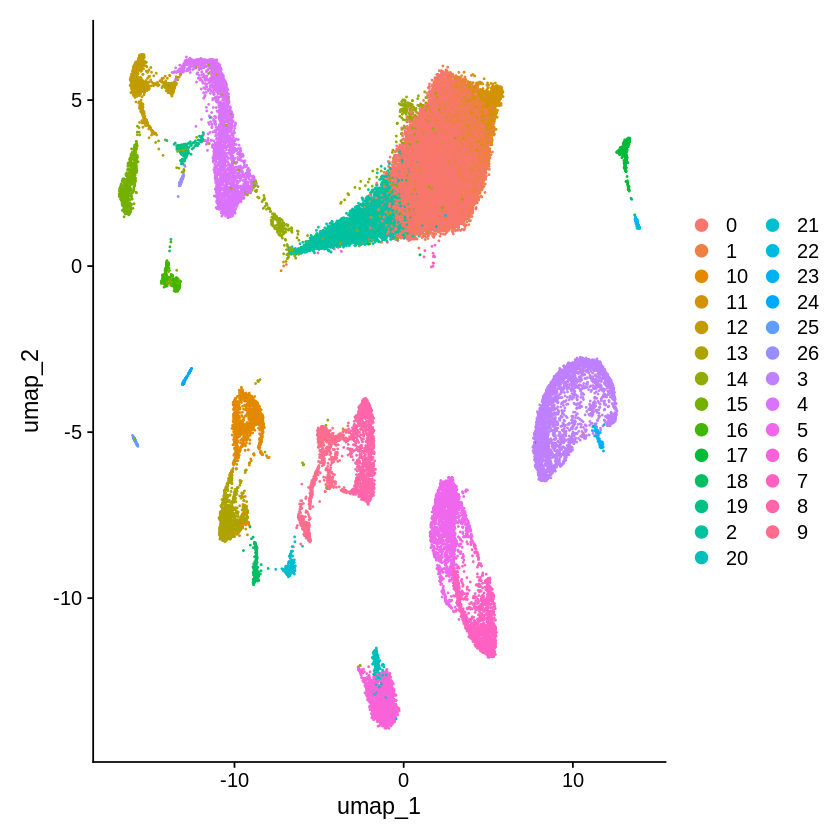

In [ ]:
Idents(seurat_hdf5) <- "RNA_snn_res.0.5"
head(Idents(seurat_hdf5))
gc()
# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages = 'umap-learn')
seurat_hdf5 <- RunUMAP(seurat_hdf5, dims = 1:20)
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(seurat_hdf5, reduction = "umap")
gc()

AAACCCAAGCGGTAGT-2  AAACCCAAGGTTCAGG-2  AAACCCAGTCGTTCAA-2  AAACCCATCGGCGATC-2 
                  6                   0                   0                   0 
 AAACCCATCTGGCCGA-2  AAACGAAAGACATCCT-2  AAACGAAGTAGATTAG-2  AAACGAAGTAGGGTAC-2 
                 16                   0                   0                   1 
 AAACGCTCATTATGCG-2  AAACGCTGTAGAAACT-2  AAACGCTTCTGGTCAA-2  AAAGAACAGTCACGAG-2 
                  0                  10                   1                   0 
 AAAGAACCAACACTAC-2  AAAGAACCATCTTCGC-2  AAAGAACTCCGTGTGG-2  AAAGGATGTTGCCAAT-2 
                  8                   0                   0                   0 
 AAAGGGCAGACAAGCC-2  AAAGGGCAGGCGAACT-2  AAAGGGCCAAATGATG-2  AAAGGGCCAATCGCCG-2 
                  6                   0                   0                  13 
 AAAGGGCCACGCGTCA-2  AAAGGGCGTTGGACCC-2  AAAGGGCTCTTCTTCC-2  AAAGGTAAGTATAGGT-2 
                  2                  10                   0                   1 
 AAAGGTATCAGACCCG-2  AAAGTCCAGGTATAGT-2  AAAGTCCTCACCTGTC-2  AAAGTCCTCGACCCAG-2 
                  0                   1                   0                   0 
 AAAGTGAAGCCACAAG-2  AAAGTGACATCGGCCA-2  AAAGTGAGTAGCGTCC-2  AAAGTGAGTCTTAGTG-2 
                  0                   0                   5                   0 
 AAAGTGAGTTTCAGAC-2  AAAGTGATCTTCCAGC-2  AAATGGAAGCGCCCAT-2  AAATGGACACCCTGTT-2 
                  6                  10                   0                   0 
 AAATGGACATTCCTAT-2  AAATGGAGTCTTCCGT-2  AAATGGAGTGAATGAT-2  AAATGGATCCTCTAAT-2 
                  1                   0                   0                   3 
 AACAAAGAGACTTCAC-2  AACAAAGAGTCATTGC-2  AACAAAGGTCACCGCA-2  AACAAAGTCATTGAGC-2 
                  6                   9                   0                   0 
 AACAAAGTCCATATGG-2  AACAAAGTCTCGTGGG-2  AACAACCCACGCCACA-2  AACAACCGTACAAACA-2 
                  5                   0                   0                   3 
 AACAACCGTGCTATTG-2  AACAACCGTTCCGGTG-2  AACAACCTCTGGGCGT-2  AACAAGAAGCAACAAT-2 
                  0                   0                   2                   0 
 AACAAGAAGGGCGAAG-2  AACAAGAAGTTGCATC-2  AACAAGACAAATGAAC-2  AACAAGAGTACGTGAG-2 
                  4                   6                   5                   9 
 AACAAGAGTGAGTGAC-2  AACAAGAGTTTCGTAG-2  AACAAGATCCATGCAA-2  AACAAGATCGACCAAT-2 
                  0                   9                   0                   0 
 AACACACGTAGAATAC-2  AACAGGGAGTATGACA-2  AACAGGGCAGTCTGGC-2  AACAGGGCATCTTCGC-2 
                  0                   0                   4                   0 
 AACCAACAGACTACGG-2  AACCAACCAAAGAACT-2  AACCAACCAGCACAAG-2  AACCAACCATTCAGCA-2 
                  0                   0                   0                   2 
 AACCAACGTCATGGCC-2  AACCAACGTTCTAACG-2  AACCACAAGACAAGCC-2  AACCACAAGGAGCTGT-2 
                  0                  14                   0                  10 
 AACCACAAGTCTAGCT-2  AACCACACATCTGCGG-2  AACCACAGTATGCAAA-2  AACCACAGTATGTGTC-2 
                  0                   2                  10                   1 
 AACCACATCCATTGGA-2  AACCACATCTACTGCC-2  AACCATGCAGCGTGCT-2  AACCATGCATCACAGT-2 
                  4                  11                   1                   0 
 AACCATGTCTGAGAAA-2  AACCCAAAGAGAGTGA-2  AACCCAAAGGTCTGGA-2  AACCCAACAAGCGAAC-2 
                  0                   0                  10                   2 
 AACCCAACAATCAGCT-2  AACCCAACACTACCCT-2  AACCCAAGTTCGTACA-2  AACCCAAGTTTACGTG-2 
                  0                   2                  11                   0 
 AACCTGAAGGTGCATG-2  AACCTGAAGTCATCCA-2  AACCTGAGTACGGATG-2  AACCTGATCAACGAGG-2 
                  1                   0                   0                  10 
 AACCTGATCAGCTTGA-2  AACCTGATCCACCTCA-2  AACCTGATCCGAGAAG-2  AACCTGATCTCGACGG-2 
                  1                   4                   0                   0 
 AACCTTTAGTCTACCA-2  AACCTTTCAATTGGTC-2  AACCTTTGTGTTTACG-2  AACGAAACACCCTTAC-2 
                  2             

used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells    4482730   239.5    7612859   406.6    7612859   406.6
Vcells 2597238457 19815.4 8599615664 65609.9 7166275048 54674.4

11:14:59 UMAP embedding parameters a = 0.9922 b = 1.112

11:14:59 Read 47944 rows and found 20 numeric columns

11:14:59 Using Annoy for neighbor search, n_neighbors = 30

11:14:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:15:06 Writing NN index file to temp file /tmp/RtmpxaGaEz/file974630793e2

11:15:06 Searching Annoy index using 1 thread, search_k = 3000

11:15:30 Annoy recall = 100%

11:15:30 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:15:32 Initializing from normalized Laplacian + noise (using RSpectra)

11:15:48 Commencing optimization for 200 epochs, with 2245762 positive edges

11:16:13 Optimization finished



used       (Mb)    gc trigger (Mb)    max used   (Mb)   
Ncells    4502780   240.5    7612859   406.6    7612859   406.6
Vcells 2597893224 19820.4 8599615664 65609.9 7166275048 54674.4

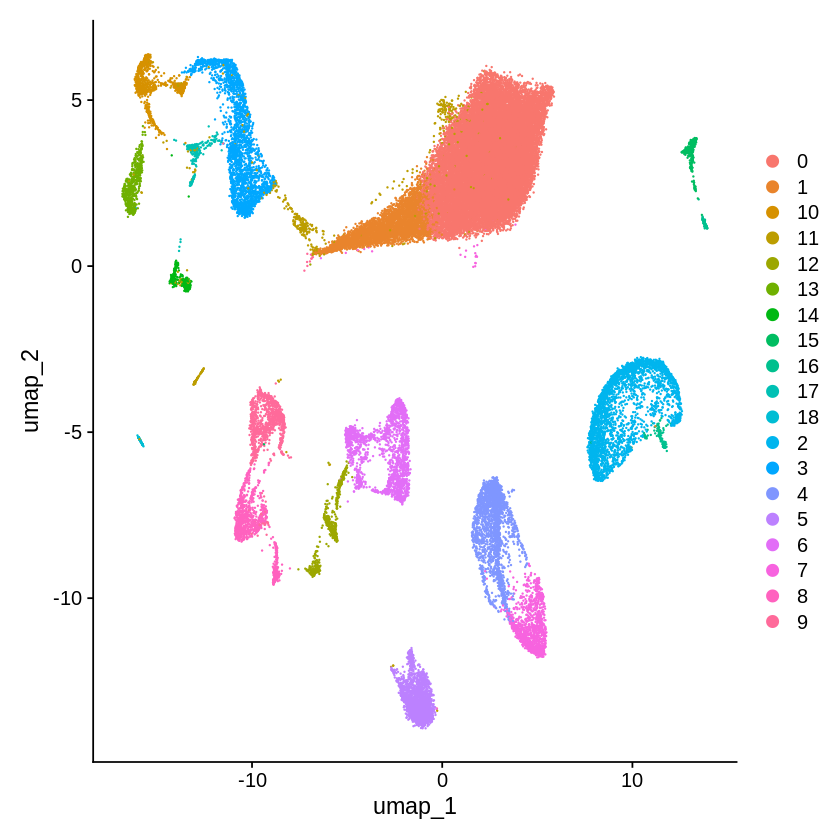

In [ ]:
Idents(seurat_hdf5) <- "SCT_snn_res.0.3"
head(Idents(seurat_hdf5))
gc()
# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages = 'umap-learn')
seurat_hdf5 <- RunUMAP(seurat_hdf5, dims = 1:20)
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
DimPlot(seurat_hdf5, reduction = "umap")
gc()

In [ ]:
saveRDS(seurat_hdf5, file = "/content/drive/My Drive/major_project/seurat_hdf5.rds")


In [ ]:
#active assay selected of 0.5 resolution
str(seurat_hdf5)

ERROR: Error: object 'seurat_hdf5' not found


In [ ]:
# Load the Seurat object from the .rds file
file_path <- "/content/drive/My Drive/major_project/seurat_hdf5.rds"
seurat_hdf5 <- readRDS(file = file_path)

# Check the loaded object
seurat_hdf5
str(seurat_hdf5)
head(seurat_hdf5)

An object of class Seurat 
35265 features across 47944 samples within 1 assay 
Active assay: RNA (35265 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:137974518] 9 10 27 52 55 61 71 73 79 83 ...
  .. .. .. .. .. .. ..@ p       : int [1:47945] 0 6137 8141 10281 12256 13735 15987 18626 19835 23211 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 35265 47944
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:137974518] 1 1 1 1 1 1 1 1 1 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:137974518] 9 10 27 52 55 61 71 73 79 83 ...
  .. .. .. .. .. .. ..@ p       : int [1:47945] 0 6137 8141 10281 122

orig.ident nCount_RNA nFeature_RNA condition percent.mt
AAACCCAAGCGGTAGT-2 AD         25340      6137         treated   0.04340963
AAACCCAAGGTTCAGG-2 AD          5245      2004         treated   0.03813155
AAACCCAGTCGTTCAA-2 AD          4921      2140         treated   0.18288966
AAACCCATCGGCGATC-2 AD          4572      1975         treated   0.19685039
AAACCCATCTGGCCGA-2 AD          2759      1479         treated   0.39869518
AAACGAAAGACATCCT-2 AD          5824      2252         treated   0.00000000
AAACGAAGTAGATTAG-2 AD          6448      2639         treated   0.15508685
AAACGAAGTAGGGTAC-2 AD          1912      1209         treated   0.73221757
AAACGCTCATTATGCG-2 AD          9693      3376         treated   0.06190034
AAACGCTGTAGAAACT-2 AD         26980      6173         treated   0.41512231
                   RNA_snn_res.0.1 RNA_snn_res.0.3 RNA_snn_res.0.5
AAACCCAAGCGGTAGT-2 4               6               7              
AAACCCAAGGTTCAGG-2 0               0               0              
AAACCCAGTCGTTCAA-2 0               0               0              
AAACCCATCGGCGATC-2 0               0               0              
AAACCCATCTGGCCGA-2 2               16              12             
AAACGAAAGACATCCT-2 0               0               0              
AAACGAAGTAGATTAG-2 0               0               0              
AAACGAAGTAGGGTAC-2 0               1               1              
AAACGCTCATTATGCG-2 0               0               0              
AAACGCTGTAGAAACT-2 7               10              10             
                   RNA_snn_res.0.7 RNA_snn_res.0.9 RNA_snn_res.1.1
AAACCCAAGCGGTAGT-2 7               8               7              
AAACCCAAGGTTCAGG-2 0               0               0              
AAACCCAGTCGTTCAA-2 0               0               0              
AAACCCATCGGCGATC-2 0               0               0              
AAACCCATCTGGCCGA-2 14              16              28             
AAACGAAAGACATCCT-2 0               0               0              
AAACGAAGTAGATTAG-2 0               1               0              
AAACGAAGTAGGGTAC-2 1               1               2              
AAACGCTCATTATGCG-2 0               0               0              
AAACGCTGTAGAAACT-2 12              15              16             
                   RNA_snn_res.1.3 RNA_snn_res.1.5 RNA_snn_res.1.7
AAACCCAAGCGGTAGT-2 8               7               22             
AAACCCAAGGTTCAGG-2 0               0               0              
AAACCCAGTCGTTCAA-2 0               0               0              
AAACCCATCGGCGATC-2 0               0               0              
AAACCCATCTGGCCGA-2 16              31              36             
AAACGAAAGACATCCT-2 0               0               4              
AAACGAAGTAGATTAG-2 0               0               0              
AAACGAAGTAGGGTAC-2 2               2               3              
AAACGCTCATTATGCG-2 0               0               0              
AAACGCTGTAGAAACT-2 15              16              17             
                   RNA_snn_res.1.9 RNA_snn_res.2 seurat_clusters
AAACCCAAGCGGTAGT-2 23              20            20             
AAACCCAAGGTTCAGG-2 0               0             0              
AAACCCAGTCGTTCAA-2 0               2             2              
AAACCCATCGGCGATC-2 0               0             0              
AAACCCATCTGGCCGA-2 20              40            40             
AAACGAAAGACATCCT-2 4               4             4              
AAACGAAGTAGATTAG-2 2               2             2              
AAACGAAGTAGGGTAC-2 3               3             3              
AAACGCTCATTATGCG-2 0               5             5              
AAACGCTGTAGAAACT-2 18              21            21

In [ ]:
# script to identify cluster identity -----------------
# Finding markers in every cluster
# Finding conserved markers
# Finding markers DE between conditions

set.seed(1234)


In [ ]:
seurat_result <- seurat_hdf5

In [ ]:
str(seurat_result)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:137974518] 9 10 27 52 55 61 71 73 79 83 ...
  .. .. .. .. .. .. ..@ p       : int [1:47945] 0 6137 8141 10281 12256 13735 15987 18626 19835 23211 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 35265 47944
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:137974518] 1 1 1 1 1 1 1 1 1 5 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:137974518] 9 10 27 52 55 61 71 73 79 83 ...
  .. .. .. .. .. .. ..@ p       : int [1:47945] 0 6137 8141 10281 122

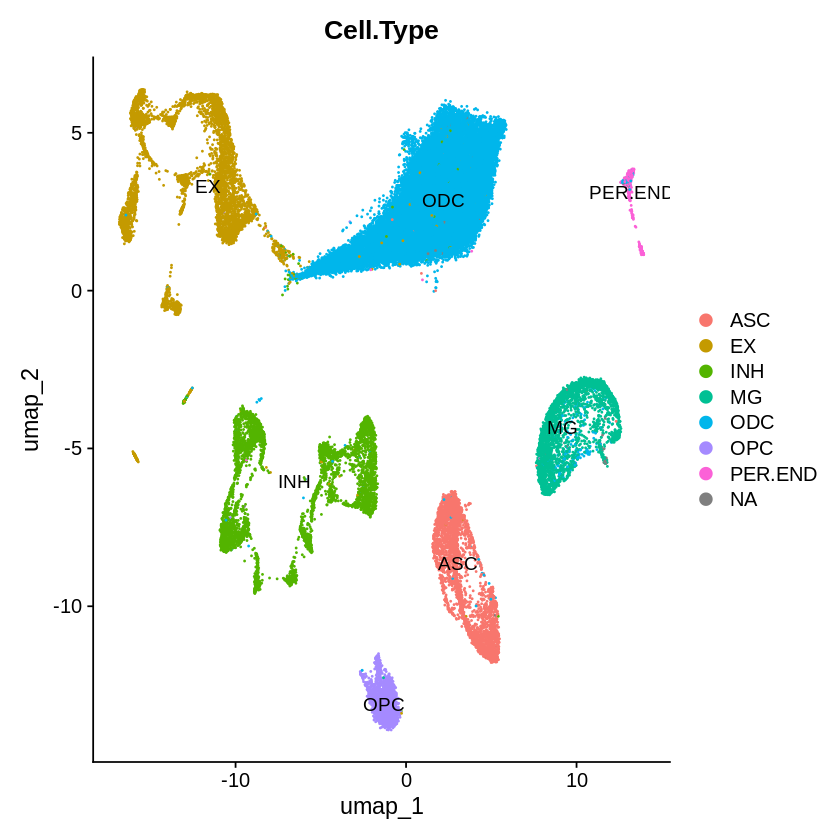

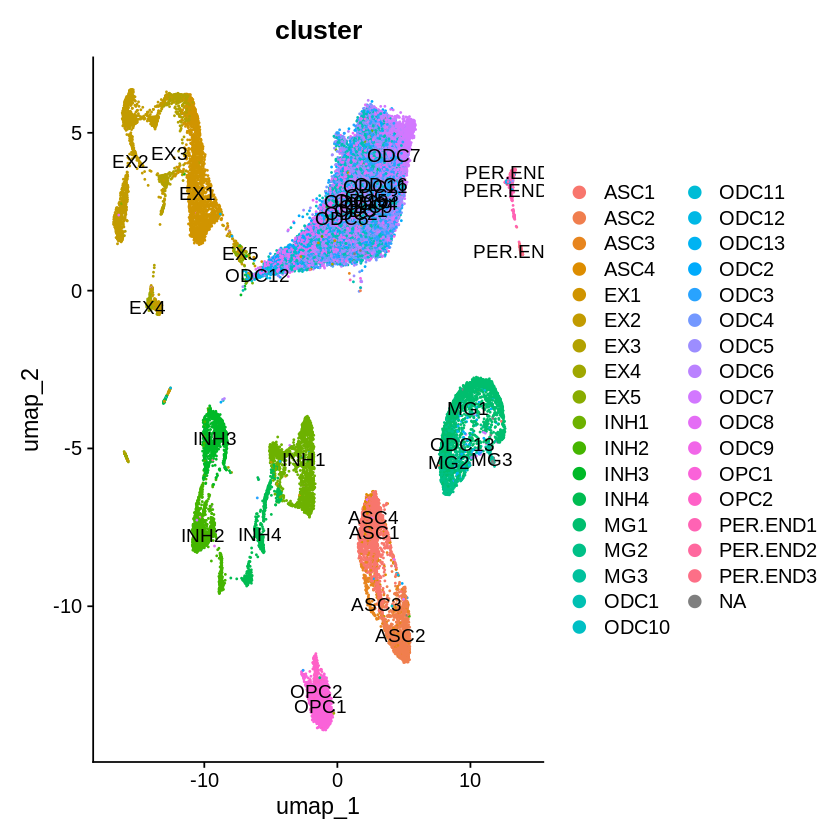

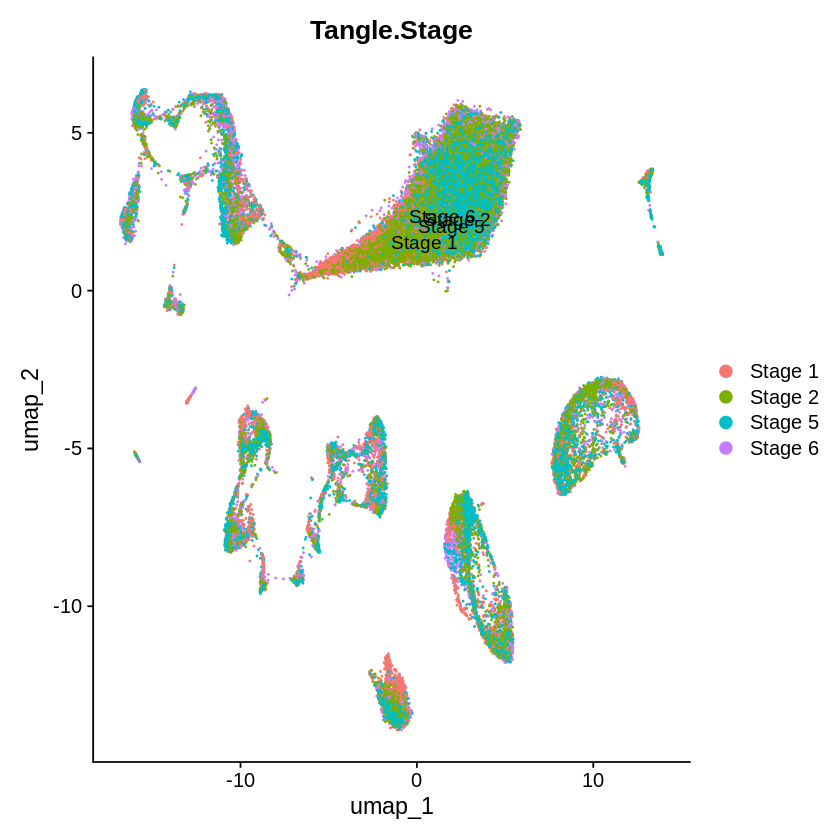

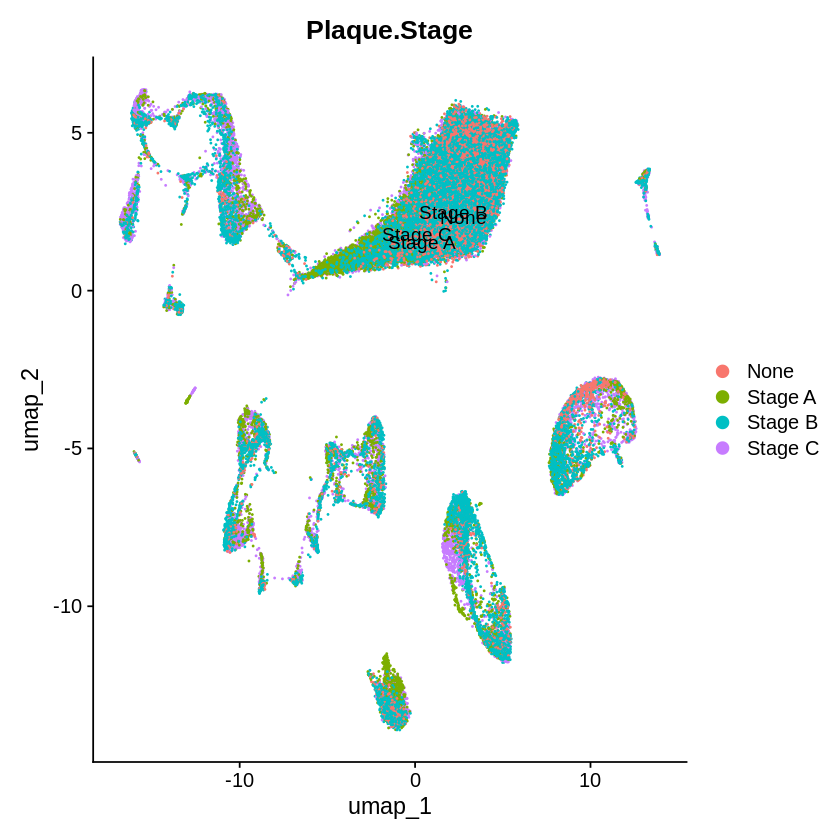

In [ ]:
DimPlot(seurat_result, reduction = 'umap', group.by = 'Cell.Type', label = TRUE)
DimPlot(seurat_result, reduction = 'umap', group.by = 'cluster',, label = TRUE)
DimPlot(seurat_result, reduction = 'umap', group.by = 'Tangle.Stage', label = TRUE)
DimPlot(seurat_result, reduction = 'umap', group.by = 'Plaque.Stage',, label = TRUE)

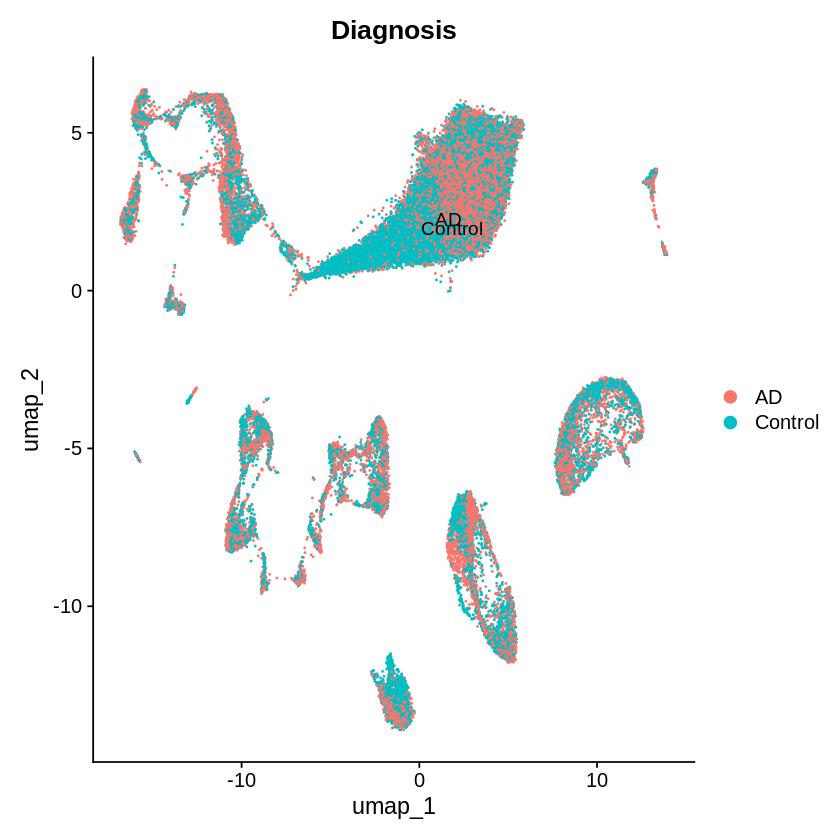

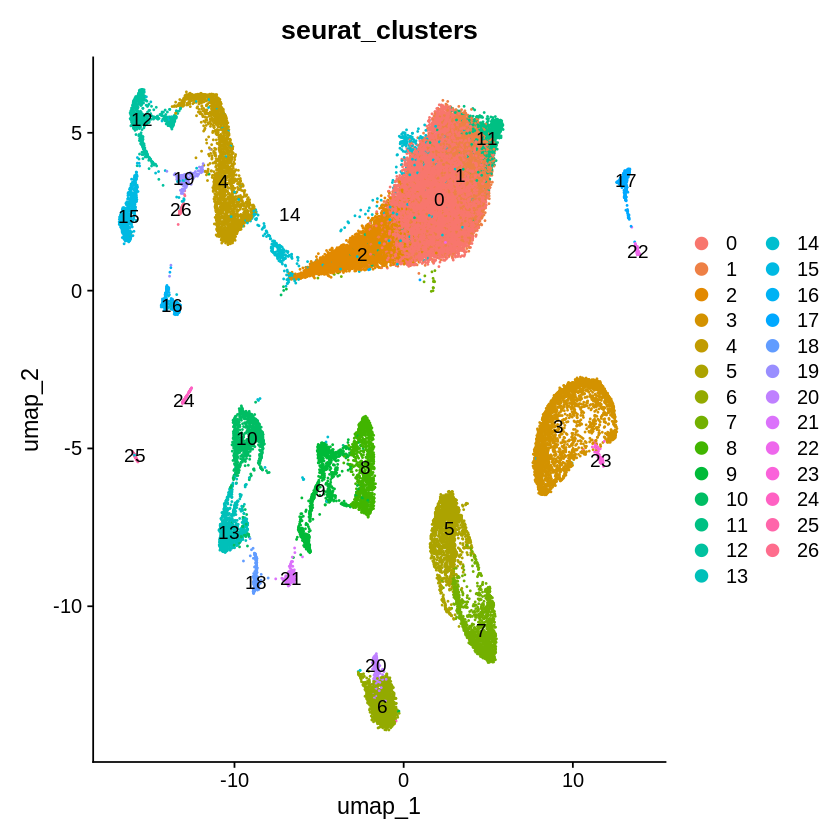

In [ ]:
# visualize data
clusters <- DimPlot(seurat_result, reduction = 'umap', group.by = 'seurat_clusters', label = TRUE)
condition <- DimPlot(seurat_result, reduction = 'umap', group.by = 'Diagnosis',, label = TRUE)

condition
clusters
#conditin|clusters

In [ ]:
table(Idents(seurat_result))


    0     1    10    11    12    13    14    15    16    17     2     3     4 
28906  3507   308   232   169   129   112   105   103    66  3096  2571  2308 
    5     6     7     8     9 
 2077  1896  1461   580   318 

In [ ]:
# Notes:
# slot depends on the type of the test used,
# default is data slot that stores normalized data
# DefaultAssay(seurat_hdf5) <- 'RNA'

DefaultAssay(seurat_result)


[1] "RNA"

In [ ]:
# findConserved markers -------------

markers_cluster <- FindConservedMarkers(seurat_result,
                     ident.1 = 1:,
                     grouping.var = 'condition')

head(markers_cluster3)

ERROR: Error in parse(text = input): <text>:4:34: unexpected ','
3: markers_cluster <- FindConservedMarkers(seurat_result,
4:                      ident.1 = 1:,
                                    ^


In [ ]:
# Create a list to store the markers for each cluster
all_cluster_markers <- list()

# Get unique cluster identifiers
clusters <- levels(Idents(seurat_result))  # Assuming `Idents` contains the cluster information



In [ ]:
BiocManager::install('multtest')
install.packages('metap')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'multtest'

Old packages: 'httr2', 'later', 'promises', 'usethis'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘mnormt’, ‘numDeriv’, ‘quantreg’, ‘TH.data’, ‘sandwich’, ‘DEoptimR’, ‘rbibutils’, ‘sn’, ‘mvtnorm’, ‘plotrix’, ‘multcomp’, ‘robustbase’, ‘Rdpack’, ‘TFisher’, ‘mutoss’, ‘mathjaxr’, ‘qqconf’


Warning message in install.packages("metap"):
“installation of package ‘qqconf’ had non-zero exit status”
Warning message in install.packages("metap"):
“installation of package ‘metap’ had non-zero exit status”


In [ ]:
# Loop through each cluster and find conserved markers
for (cluster in clusters) {
  # Find conserved markers for the current cluster
  markers <- FindConservedMarkers(
    seurat_result,
    ident.1 = cluster,
    grouping.var = 'condition',
    verbose = TRUE  # Optional, for detailed output during processing
  )

  # Store the markers in the list, using the cluster number as the key
  all_cluster_markers[[paste0("Cluster_", cluster)]] <- markers
}

ERROR: Error: Please install the metap package to use FindConservedMarkers.
This can be accomplished with the following commands: 
----------------------------------------
install.packages('BiocManager')
BiocManager::install('multtest')
install.packages('metap')
----------------------------------------


In [ ]:
# Inspect the results for a specific cluster (e.g., Cluster 3)
head(all_cluster_markers[["Cluster_3"]])


In [ ]:
# let's visualize top features
FeaturePlot(seurat_result, features = c('FCGR3A'), min.cutoff = 'q10')


In [ ]:
#result of deseq with umap active assay resolution of 0.5
saveRDS(seurat_hdf5, file = "/content/drive/My Drive/major_project/resultwithdeseq1.rds")


In [ ]:
#result of deseq with umap active assay resolution of 0.7
saveRDS(seurat_hdf5, file = "/content/drive/My Drive/major_project/resultwithdeseq2.rds")


In [ ]:
# rename cluster 3 ident
Idents(seurat_result)
seurat_result <- RenameIdents(seurat_result, `3` = 'CD16 Mono')

DimPlot(seurat_result, reduction = 'umap', label = T)


# Settings cluster identities is an iterative step
# multiple approaches could be taken - automatic/manual anotations (sometimes both)
# need to make sure each cell type forms a separate cluster

# setting Idents as Seurat annotations provided (also a sanity check!)
Idents(seurat_result) <- seurat_result@meta.data$seurat_annotations
Idents(seurat_result)

DimPlot(seurat_result, reduction = 'umap', label = TRUE)

In [ ]:
# findMarkers between conditions ---------------------
seurat_result$celltype.cnd <- paste0(seurat_result$seurat_annotations,'_', seurat_result$condition)
View(seurat_result@meta.data)
Idents(seurat_result) <- seurat_result$celltype.cnd

DimPlot(seurat_result, reduction = 'umap', label = TRUE)

# find markers
b.interferon.response <- FindMarkers(seurat_result, ident.1 = 'CD16 Mono_STIM', ident.2 = 'CD16 Mono_CTRL')

head(b.interferon.response)

# plotting conserved features vs DE features between conditions
head(markers_cluster3)


FeaturePlot(seurat_result, features = c('FCGR3A', 'AIF1', 'IFIT1'), split.by = 'stim', min.cutoff = 'q10')
